### **Introduction**
This project explores UFC fighter and event data to identify key patterns in performance. By analyzing metrics such as striking accuracy, takedown efficeny and submissions, we aim to better understand what leads to success in octagon.


### **Objective**

Analyze UFC fighter performance metrics to uncover trends, evaluate factors influencing outcomes and providing insights into fighter performance across different weight class, fighting styles and events. By doing this data analysis, we aim to explore relationships between key metrics such as strikig accuracy, takedown efficency and submission rates and their impact on match results. 

In [2]:
# imported python libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Loading the files
fighter_stats_path = r"../Datasets/fighter_stats.csv"
medium_dataset_path = r"../Datasets/medium_dataset.csv"
# Reading files
fighter_data = pd.DataFrame(pd.read_csv(fighter_stats_path))
event_detail_data = pd.DataFrame(pd.read_csv(medium_dataset_path))


In [4]:
#shape of fighter data
fs = fighter_data.shape
print("Fighter data")
print("Rows: ",fs[0])
print("Columns: ",fs[1])

Fighter data
Rows:  2479
Columns:  16


In [5]:
#shape of event detail data
es = event_detail_data.shape
print("Event detail data")
print("Rows: ", es[0])
print("Columns: ", es[1])

Event detail data
Rows:  7582
Columns:  19


In [6]:
# showing top 5 rows of fighter_data
fighter_data.head()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


In [7]:
#showing top 5 rows of event_details_data
event_detail_data.head()

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50


### **Cleaning data of Fighter Data**

In [8]:
#Info about the columns in fighter_data
fighter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2478 non-null   object 
 1   wins         2478 non-null   float64
 2   losses       2478 non-null   float64
 3   height       2478 non-null   float64
 4   weight       2478 non-null   float64
 5   reach        1823 non-null   float64
 6   stance       2401 non-null   object 
 7   age          2318 non-null   float64
 8   SLpM         2478 non-null   float64
 9   sig_str_acc  2478 non-null   float64
 10  SApM         2478 non-null   float64
 11  str_def      2478 non-null   float64
 12  td_avg       2478 non-null   float64
 13  td_acc       2478 non-null   float64
 14  td_def       2478 non-null   float64
 15  sub_avg      2478 non-null   float64
dtypes: float64(14), object(2)
memory usage: 310.0+ KB


In [9]:
#Finding unique values in each column
fighter_data.nunique()

name           2472
wins             54
losses           33
height           23
weight           80
reach            27
stance            5
age              47
SLpM            620
sig_str_acc      75
SApM            629
str_def          76
td_avg          486
td_acc           82
td_def           92
sub_avg          64
dtype: int64

In [10]:
#Statistical description of non-categorial column in fighter_data
fighter_data.describe()

,wins,losses,height,weight,reach,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
count,2478.000000,2478.000000,2478.000000,2478.000000,1823.000000,2318.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,14.399112,6.111380,178.384262,76.876852,182.035656,37.727783,2.932623,0.406029,3.388567,0.488910,1.393543,0.322571,0.494972,0.602179
std,9.853474,4.548011,8.851777,17.976646,10.654129,7.251188,1.736693,0.151297,2.027258,0.162305,1.512821,0.256928,0.297551,1.057863
min,0.000000,0.000000,152.400000,52.160000,147.320000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,172.720000,65.770000,175.260000,32.000000,1.810000,0.360000,2.320000,0.450000,0.120000,0.070000,0.300000,0.000000
50%,13.000000,5.000000,177.800000,77.110000,182.880000,37.000000,2.900000,0.430000,3.230000,0.520000,1.000000,0.330000,0.550000,0.300000
75%,18.000000,8.000000,185.420000,83.910000,190.500000,42.000000,3.920000,0.500000,4.290000,0.580000,2.065000,0.480000,0.710000,0.800000
max,253.000000,53.000000,210.820000,349.270000,213.360000,81.000000,23.330000,1.000000,42.000000,1.000000,13.950000,1.000000,1.000000,16.400000


In [11]:
#Statistical description of categorical column in fighter data
fighter_data.describe(include='object')

,name,stance
count,2478,2401
unique,2472,5
top,Felix Lee Mitchell,Orthodox
freq,3,1840


In [12]:
#Checking if there is any null values in fighter data
fighter_data.isna().sum()

name             1
wins             1
losses           1
height           1
weight           1
reach          656
stance          78
age            161
SLpM             1
sig_str_acc      1
SApM             1
str_def          1
td_avg           1
td_acc           1
td_def           1
sub_avg          1
dtype: int64

In [13]:
#check for null rows
null_rows = fighter_data[fighter_data.isna().any(axis=1)]
null_rows

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
21,Daria Zhelezniakova,9.0,1.0,175.26,61.23,172.72,NaN,28.0,3.80,0.38,1.67,0.82,0.00,0.00,0.50,0.0
1101,Jesus Pinedo,16.0,5.0,177.80,70.31,NaN,Southpaw,27.0,3.23,0.38,4.37,0.52,2.50,1.00,1.00,0.0
1131,Michel Batista,4.0,1.0,190.50,117.93,NaN,Orthodox,39.0,0.00,0.00,4.03,0.40,6.72,0.50,0.00,0.0
1166,Kalindra Faria,18.0,8.0,170.18,56.70,NaN,Switch,37.0,2.23,0.56,1.44,0.45,1.31,0.66,0.20,0.7
1182,Jay Cucciniello,8.0,1.0,170.18,70.31,NaN,Orthodox,37.0,0.93,0.21,4.73,0.36,0.00,0.00,0.71,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2477,Sean Daugherty,0.0,2.0,182.88,79.38,NaN,NaN,48.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [14]:
#Dropedd row at index 2478 as it is null
fighter_data = fighter_data.drop(index=2478)

In [15]:
#checking which null values are left
fighter_data.isna().sum()

name             0
wins             0
losses           0
height           0
weight           0
reach          655
stance          77
age            160
SLpM             0
sig_str_acc      0
SApM             0
str_def          0
td_avg           0
td_acc           0
td_def           0
sub_avg          0
dtype: int64

In [16]:
# Finding out the percentage of empty data
(fighter_data.isna().sum() / len(fighter_data)) * 100

name            0.000000
wins            0.000000
losses          0.000000
height          0.000000
weight          0.000000
reach          26.432607
stance          3.107345
age             6.456820
SLpM            0.000000
sig_str_acc     0.000000
SApM            0.000000
str_def         0.000000
td_avg          0.000000
td_acc          0.000000
td_def          0.000000
sub_avg         0.000000
dtype: float64

<Axes: ylabel='reach'>

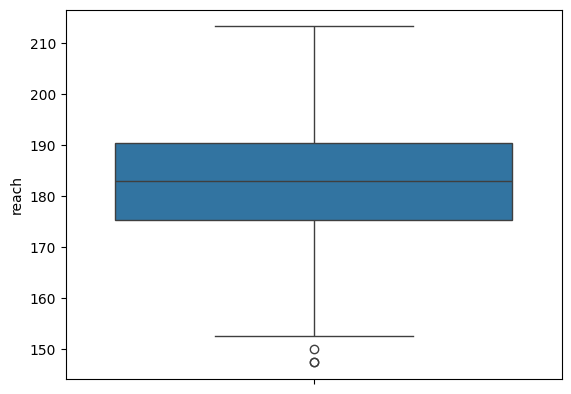

In [17]:
#Checking for outliers in r_td column
sns.boxplot(fighter_data['reach'])

In [18]:
#Filling data in reach field
fighter_data['reach'] = fighter_data['reach'].fillna(fighter_data['reach'].median())

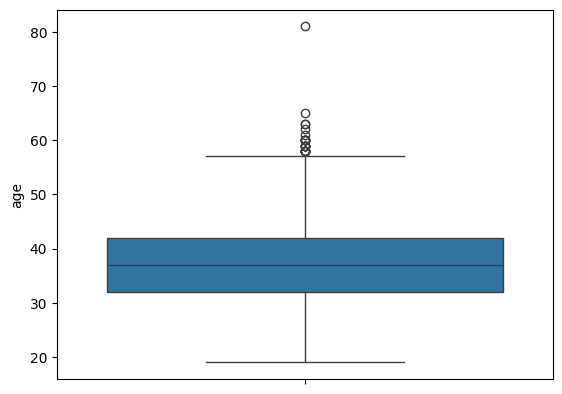

In [19]:
#checking for outliers in age column of fighter_data
sns.boxplot(fighter_data['age'])
plt.show()

In [20]:
#Using median to fill null values in age column
#As there are outliers in age columns
fighter_data['age'] = fighter_data['age'].fillna(fighter_data['age'].median())

In [21]:
#using mode to fill null value in stance column
fighter_data['stance'] = fighter_data['stance'].fillna(fighter_data['stance'].mode()[0])

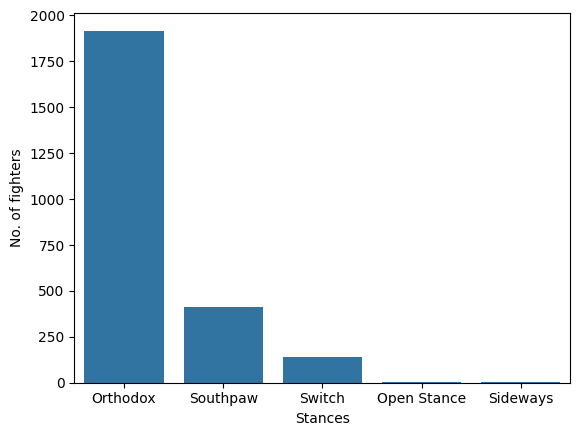

In [22]:
unique_stance = fighter_data['stance'].value_counts().index
count_stance = fighter_data['stance'].value_counts().values
sns.barplot(x=unique_stance,y=count_stance)
plt.xlabel("Stances")
plt.ylabel("No. of fighters")
plt.show()

In [23]:
# Combining SLpm and SApm to create Strking Efficiency(SEff)
fighter_data['SEff'] = fighter_data['SLpM']/(fighter_data['SLpM']+fighter_data['SApM']) 

In [24]:
# Combining td_acc and td_def to create Grappling Score(Gscr)
fighter_data['Gscr'] = (fighter_data['td_acc'] + fighter_data['td_def'])/2

In [25]:
# Combining win and loss to create win ration (win_rto)
fighter_data['win_rto'] = fighter_data['wins']/(fighter_data['wins']+fighter_data['losses'])*100

In [26]:
#Combining SEff and Gscr to get a efficiency score(EffScore)
fighter_data["EffScore"] = (fighter_data['SEff'] + fighter_data['Gscr'])/2

In [27]:
#Finding difference between wins and losses (WinDiff)
fighter_data['WinDiff'] = fighter_data['wins'] - fighter_data['losses']

In [28]:
#Getting to know the advantage relative to fighter's height
fighter_data['Reach-to-Height Ratio'] = fighter_data['reach']/fighter_data['height']

In [29]:
#Provides insight into body type differeences
fighter_data['Weight-to-Height Ratio'] = fighter_data['weight']/fighter_data['height']

In [30]:
#Droping all the unnecessary columns as they have been combined
fighter_data = fighter_data.drop(
    columns=[
        "SLpM",
        "sig_str_acc",
        "SApM",
        "str_def",
        "td_avg",
        "td_acc",
        "td_def",
        "sub_avg",
    ],
    axis=1,
)

In [31]:
#knowing how the shape has change of dataframe
fighter_data.shape

(2478, 15)

In [32]:
fighter_data.isna().sum()

name                        0
wins                        0
losses                      0
height                      0
weight                      0
reach                       0
stance                      0
age                         0
SEff                      165
Gscr                        0
win_rto                     0
EffScore                  165
WinDiff                     0
Reach-to-Height Ratio       0
Weight-to-Height Ratio      0
dtype: int64

<Axes: ylabel='EffScore'>

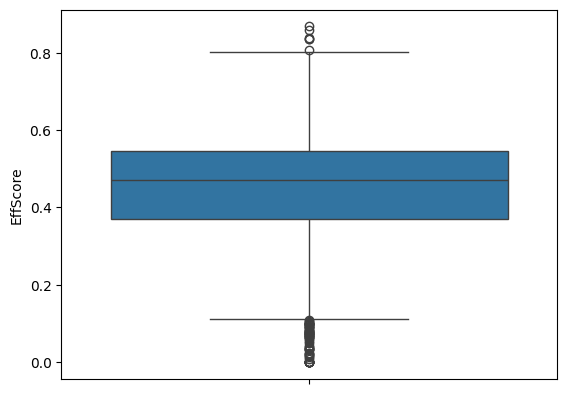

In [33]:
sns.boxplot(fighter_data['EffScore'])

In [34]:
fighter_data['EffScore'] = fighter_data['EffScore'].fillna(fighter_data['EffScore'].median())

<Axes: ylabel='SEff'>

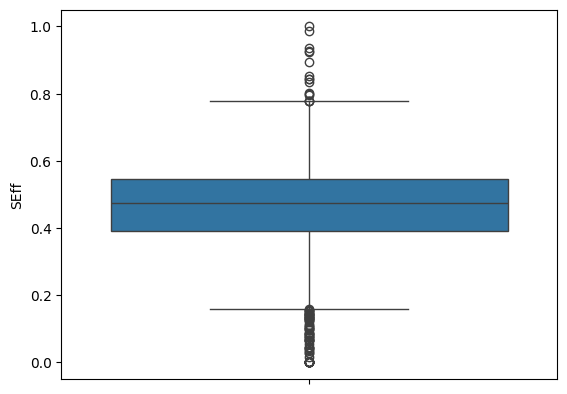

In [35]:
sns.boxplot(fighter_data['SEff'])

In [36]:
fighter_data["SEff"] = fighter_data["SEff"].fillna(
    fighter_data["SEff"].median()
)

In [37]:
#Saving the fighter data to a new csv file
fighter_data.to_csv('../Datasets/cleaned_fighter_stats.csv')

In [38]:
fighter_data.nunique()

name                      2472
wins                        54
losses                      33
height                      23
weight                      80
reach                       27
stance                       5
age                         47
SEff                      2224
Gscr                       231
win_rto                    290
EffScore                  2283
WinDiff                     53
Reach-to-Height Ratio      176
Weight-to-Height Ratio     279
dtype: int64

In [39]:
fighter_data.head()

,name,wins,losses,height,weight,reach,stance,age,SEff,Gscr,win_rto,EffScore,WinDiff,Reach-to-Height Ratio,Weight-to-Height Ratio
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,0.576588,0.680,70.588235,0.628294,7.0,1.047619,0.354331
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,0.512500,0.530,68.421053,0.521250,7.0,1.000000,0.343428
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,0.628009,0.750,90.909091,0.689004,9.0,1.053333,0.559528
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,0.448957,0.250,63.636364,0.349479,3.0,1.027778,0.654801
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,0.468140,0.505,76.470588,0.486570,9.0,1.013514,0.446425


### **Visualization of Fighter Data**

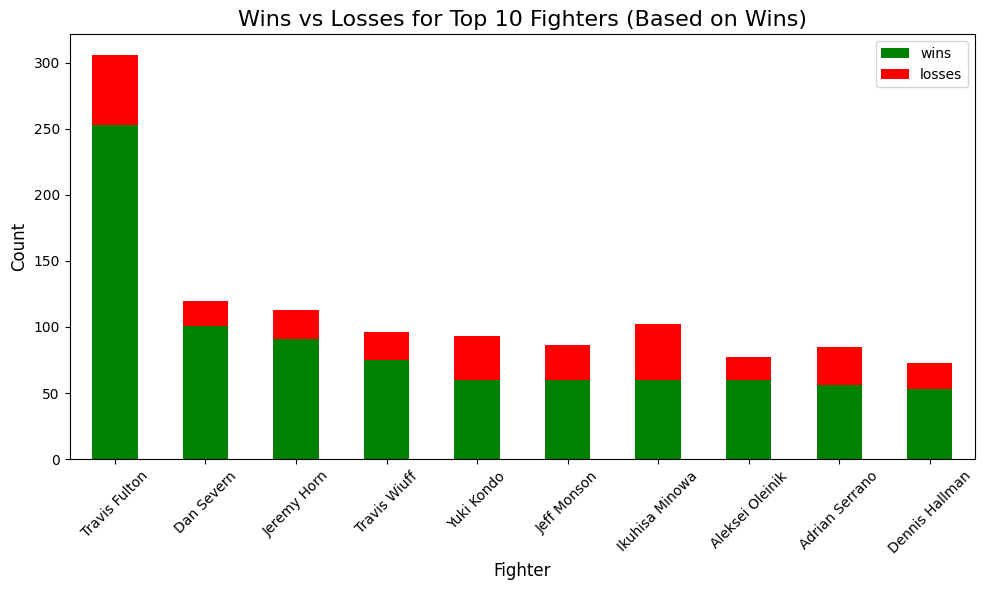

In [53]:
# Sort by 'wins' and get the top 10 fighters
fighter_stats = (
    fighter_data[["name", "wins", "losses", "win_rto"]]
    .sort_values(by="wins", ascending=False)
    .head(10)
)

# Plotting wins and losses
fighter_stats.set_index("name")[["wins", "losses"]].plot(
    kind="bar", stacked=True, figsize=(10, 6), color=["green", "red"]
)
plt.title("Wins vs Losses for Top 10 Fighters (Based on Wins)", fontsize=16)
plt.xlabel("Fighter", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

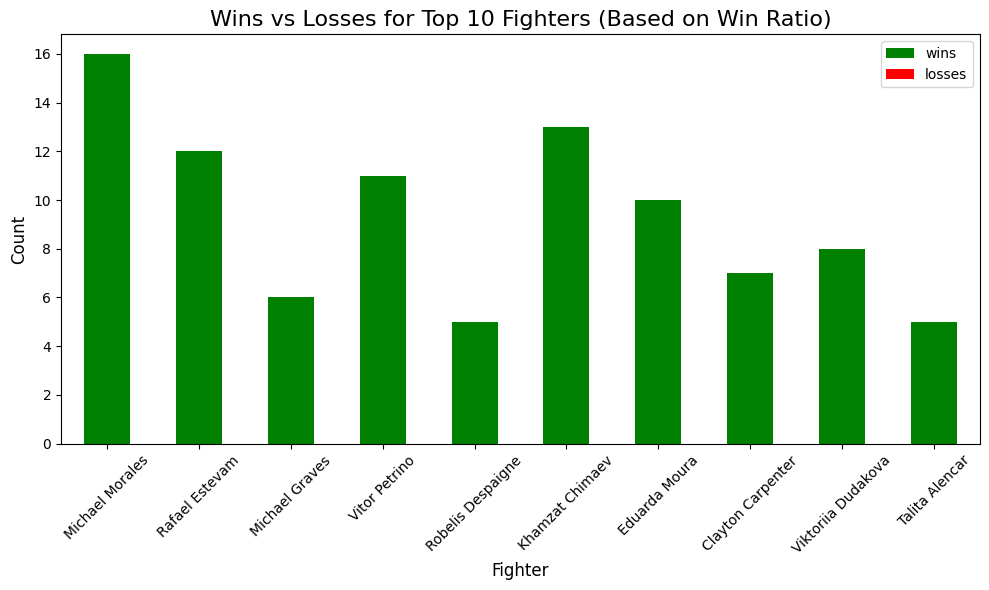

In [54]:
# Sort by 'win_rto' (win ratio) and get the top 10 fighters
fighter_stats = (
    fighter_data[["name", "wins", "losses", "win_rto"]]
    .sort_values(by="win_rto", ascending=False)
    .head(10)
)

# Plotting wins and losses
fighter_stats.set_index("name")[["wins", "losses"]].plot(
    kind="bar", stacked=True, figsize=(10, 6), color=["green", "red"]
)
plt.title("Wins vs Losses for Top 10 Fighters (Based on Win Ratio)", fontsize=16)
plt.xlabel("Fighter", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

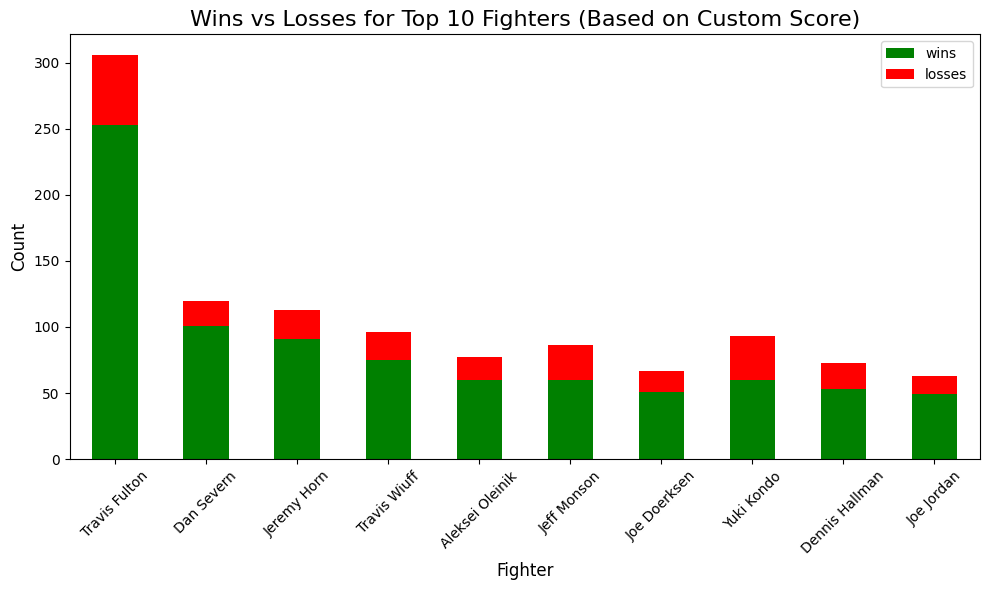

In [55]:
# Calculate a custom score based on both wins and win ratio
fighter_data["custom_score"] = fighter_data["wins"] * fighter_data["win_rto"]

# Sort by custom score and get the top 10 fighters
fighter_stats = (
    fighter_data[["name", "wins", "losses", "win_rto", "custom_score"]]
    .sort_values(by="custom_score", ascending=False)
    .head(10)
)

# Plotting wins and losses
fighter_stats.set_index("name")[["wins", "losses"]].plot(
    kind="bar", stacked=True, figsize=(10, 6), color=["green", "red"]
)
plt.title("Wins vs Losses for Top 10 Fighters (Based on Custom Score)", fontsize=16)
plt.xlabel("Fighter", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

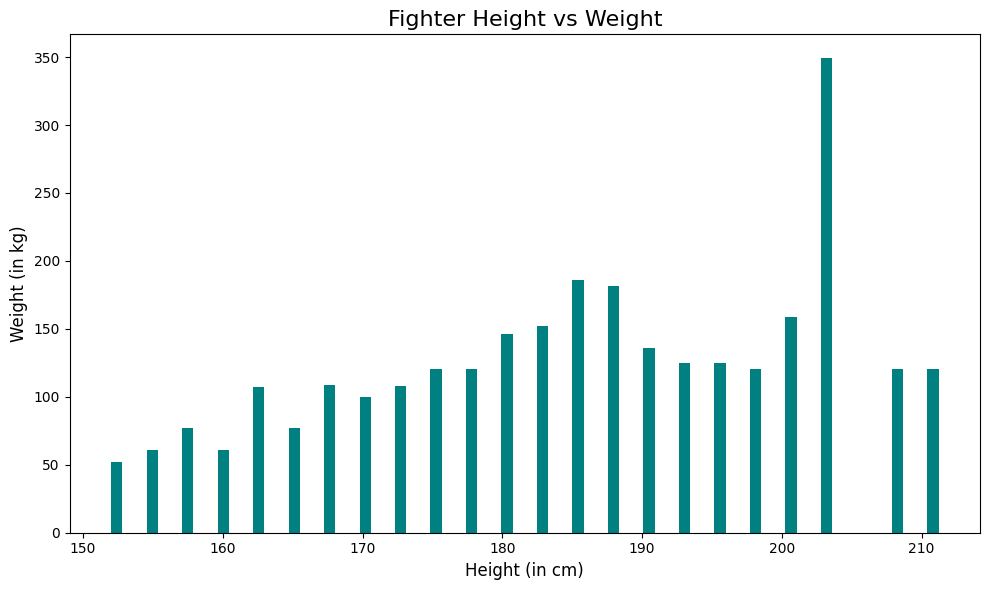

In [70]:
# bar plot for height vs weight
plt.figure(figsize=(10, 6))
plt.bar(x=fighter_data["height"], height=fighter_data["weight"],color='teal')
plt.title("Fighter Height vs Weight", fontsize=16)
plt.xlabel("Height (in cm)", fontsize=12)
plt.ylabel("Weight (in kg)", fontsize=12)
plt.tight_layout()
plt.show()

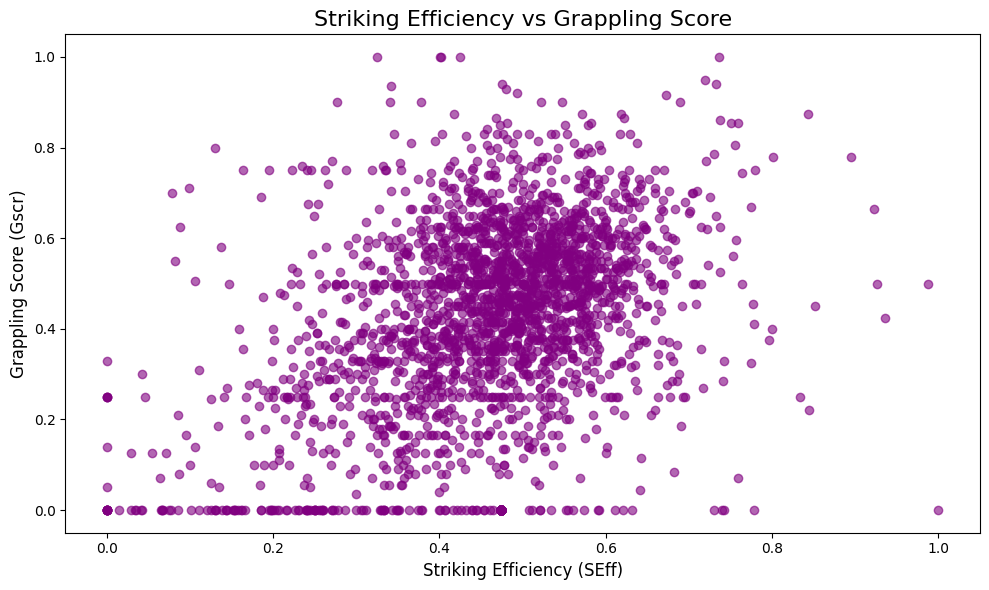

In [69]:
# Scatter plot for SEff vs Gscr
plt.figure(figsize=(10, 6))
plt.scatter(fighter_data["SEff"], fighter_data["Gscr"], color="purple", alpha=0.6)
plt.title("Striking Efficiency vs Grappling Score", fontsize=16)
plt.xlabel("Striking Efficiency (SEff)", fontsize=12)
plt.ylabel("Grappling Score (Gscr)", fontsize=12)
plt.tight_layout()
plt.show()

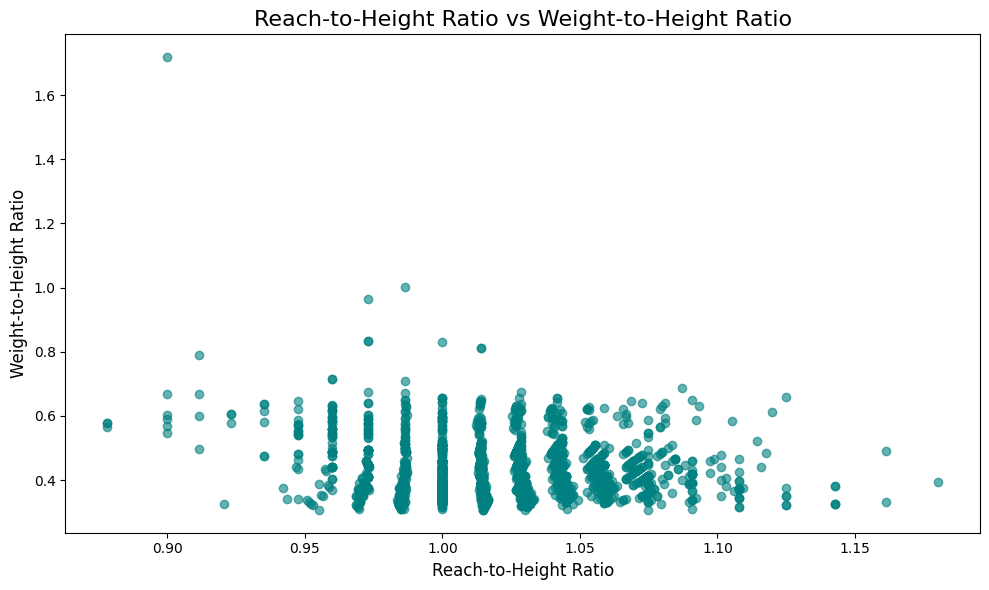

In [76]:
# Scatter plot for Reach-to-Height Ratio vs Weight-to-Height Ratio
plt.figure(figsize=(10, 6))
plt.scatter(
    fighter_data["Reach-to-Height Ratio"],
    fighter_data["Weight-to-Height Ratio"],
    color="teal",
    alpha=0.6,
)
plt.title("Reach-to-Height Ratio vs Weight-to-Height Ratio", fontsize=16)
plt.xlabel("Reach-to-Height Ratio", fontsize=12)
plt.ylabel("Weight-to-Height Ratio", fontsize=12)
plt.tight_layout()
plt.show()

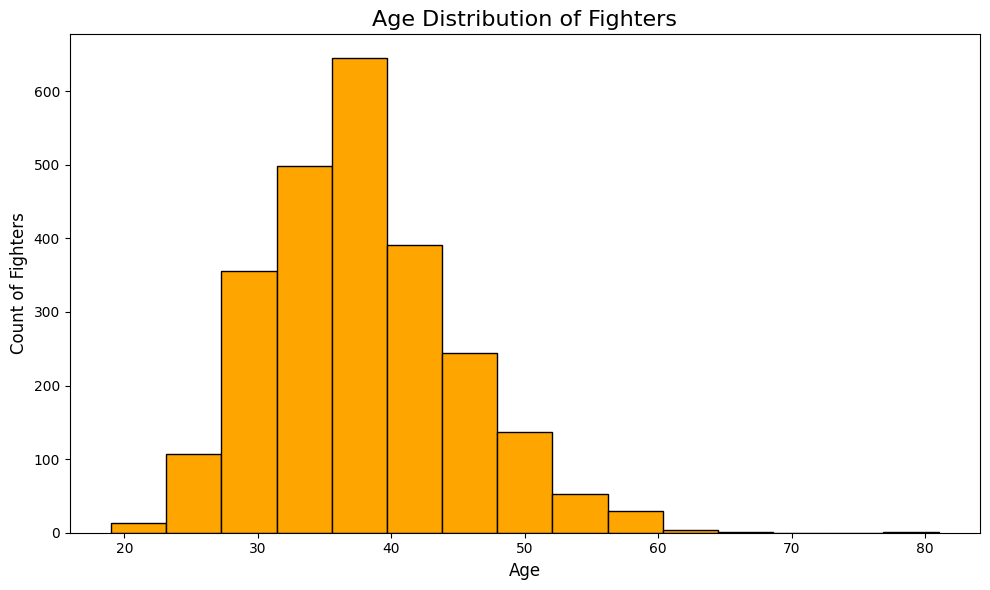

In [47]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(fighter_data["age"], bins=15, color="orange", edgecolor="black")
plt.title("Age Distribution of Fighters", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count of Fighters", fontsize=12)
plt.tight_layout()
plt.show()

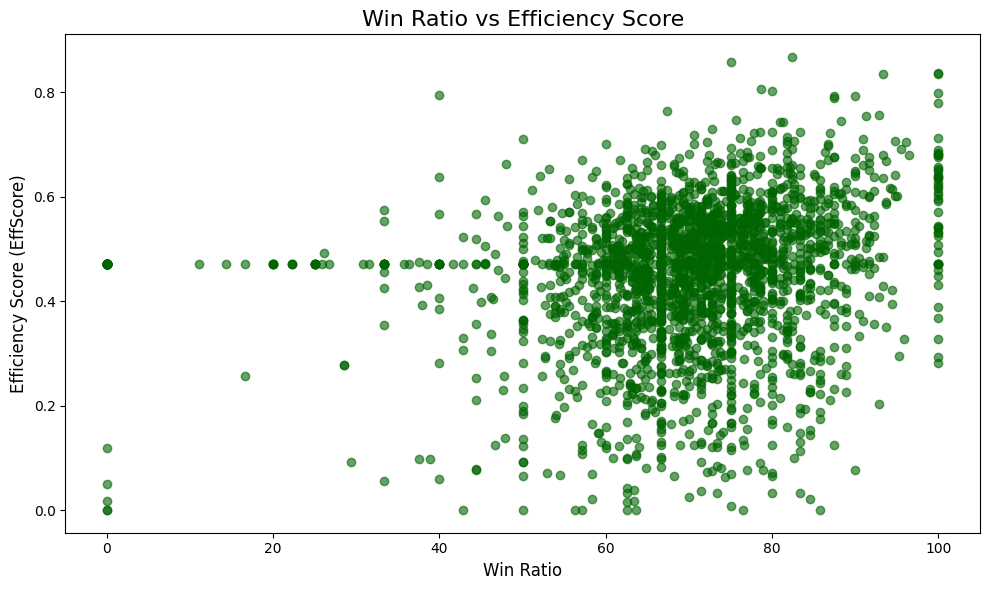

In [48]:
# Scatter plot for Win Ratio vs Efficiency Score
plt.figure(figsize=(10, 6))
plt.scatter(
    fighter_data["win_rto"], fighter_data["EffScore"], color="darkgreen", alpha=0.6
)
plt.title("Win Ratio vs Efficiency Score", fontsize=16)
plt.xlabel("Win Ratio", fontsize=12)
plt.ylabel("Efficiency Score (EffScore)", fontsize=12)
plt.tight_layout()
plt.show()

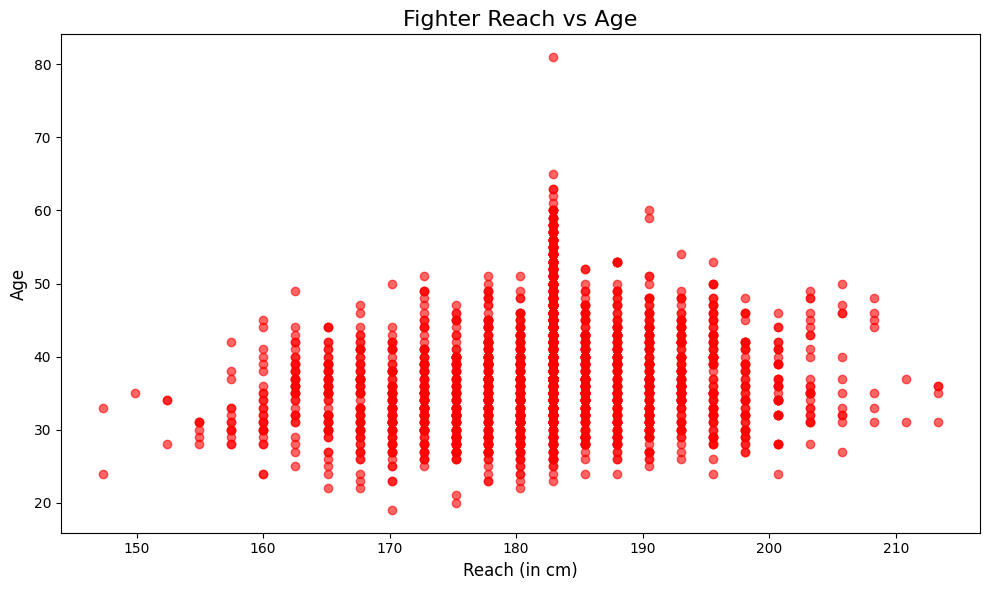

In [49]:
# Scatter plot for Reach vs Age
plt.figure(figsize=(10, 6))
plt.scatter(fighter_data["reach"], fighter_data["age"], color="red", alpha=0.6)
plt.title("Fighter Reach vs Age", fontsize=16)
plt.xlabel("Reach (in cm)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.tight_layout()
plt.show()

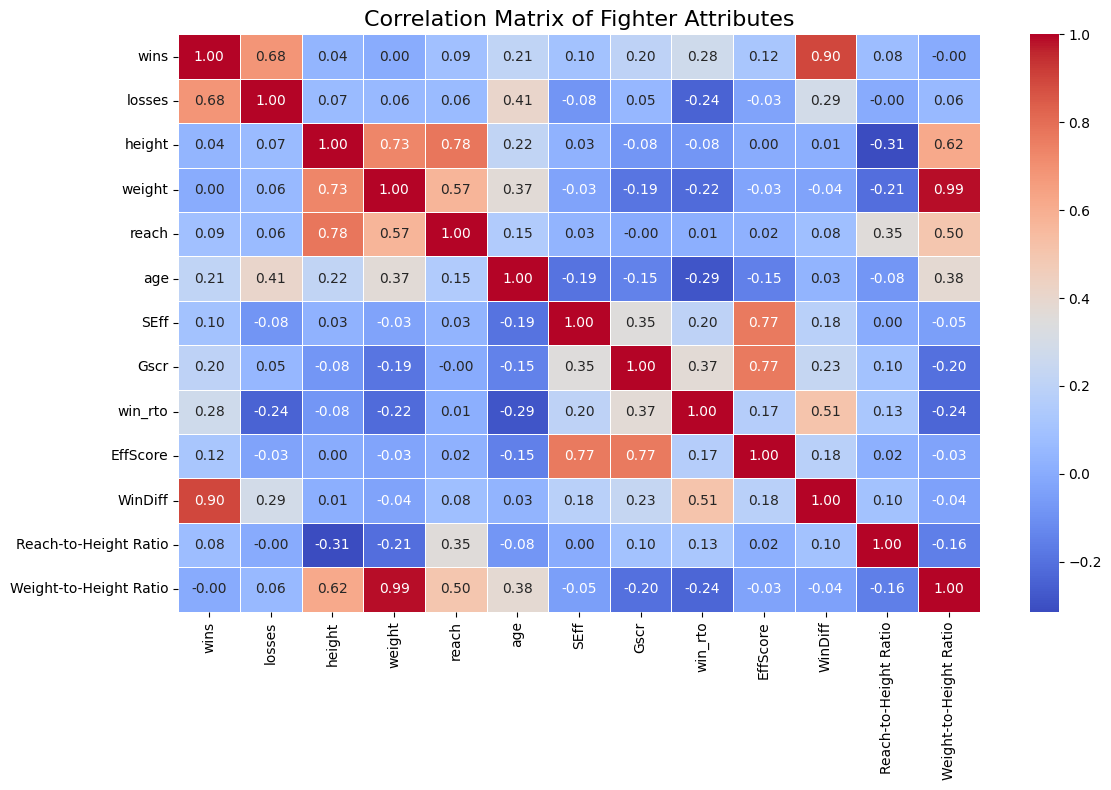

In [ ]:
# Select numerical columns for correlation analysis
numerical_columns = [
    "wins",
    "losses",
    "height",
    "weight",
    "reach",
    "age",
    "SEff",
    "Gscr",
    "win_rto",
    "EffScore",
    "WinDiff",
    "Reach-to-Height Ratio",
    "Weight-to-Height Ratio",
]
corr = fighter_data[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Fighter Attributes", fontsize=16)
plt.tight_layout()
plt.show()

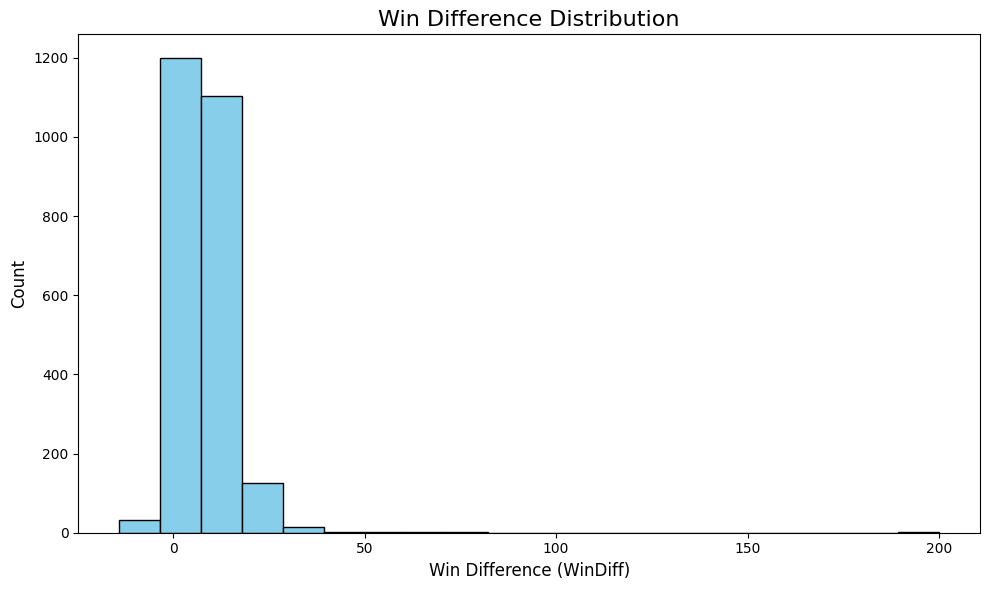

In [52]:
# Histogram for Win Difference Distribution
plt.figure(figsize=(10, 6))
plt.hist(fighter_data["WinDiff"], bins=20, color="skyblue", edgecolor="black")
plt.title("Win Difference Distribution", fontsize=16)
plt.xlabel("Win Difference (WinDiff)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

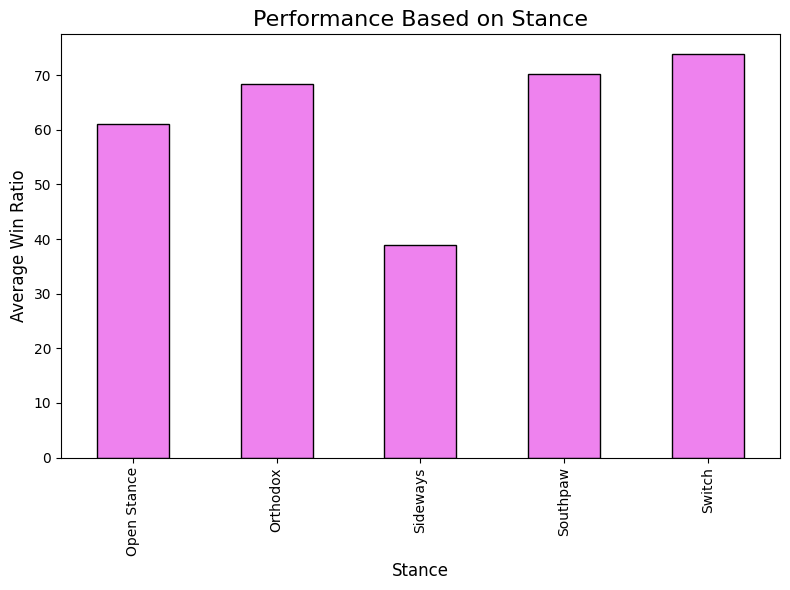

In [51]:
# Bar chart for Fighter Performance by Stance
stance_performance = fighter_data.groupby("stance")[
    "win_rto"
].mean()  # Average win ratio per stance

# Plotting bar chart
plt.figure(figsize=(8, 6))
stance_performance.plot(kind="bar", color="violet", edgecolor="black")
plt.title("Performance Based on Stance", fontsize=16)
plt.xlabel("Stance", fontsize=12)
plt.ylabel("Average Win Ratio", fontsize=12)
plt.tight_layout()
plt.show()

### **Cleaning data of Event Data**

In [555]:
#Info about the columns in fighter_data
event_detail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7582 entries, 0 to 7581
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event            7497 non-null   object 
 1   date             7497 non-null   object 
 2   location         7497 non-null   object 
 3   r_fighter        7497 non-null   object 
 4   b_fighter        7497 non-null   object 
 5   status           7582 non-null   object 
 6   r_kd             7476 non-null   float64
 7   b_kd             7476 non-null   float64
 8   r_str            7476 non-null   float64
 9   b_str            7476 non-null   float64
 10  r_td             7476 non-null   float64
 11  b_td             7476 non-null   float64
 12  r_sub            7476 non-null   float64
 13  b_sub            7476 non-null   float64
 14  weight_class     7497 non-null   object 
 15  method           7497 non-null   object 
 16  method_detailed  3836 non-null   object 
 17  round         

In [556]:
#Statistical description of non-categorial column in fighter_data
event_detail_data.describe()

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,round
count,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7497.000000
mean,0.368914,0.061798,43.488630,28.766988,1.461343,0.668539,0.534243,0.247057,2.342804
std,0.607262,0.264120,34.591414,27.099495,1.988927,1.195232,0.941658,0.684925,1.015948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,36.000000,22.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,0.000000,61.000000,42.000000,2.000000,1.000000,1.000000,0.000000,3.000000
max,5.000000,3.000000,445.000000,271.000000,21.000000,11.000000,10.000000,7.000000,5.000000


In [557]:
#Statistical description of categorial column in fighter_data
event_detail_data.describe(include="object")

,event,date,location,r_fighter,b_fighter,status,weight_class,method,method_detailed,time
count,7497,7497,7497,7497,7497,7582,7497,7497,3836,7497
unique,683,678,168,1721,2344,3,15,7,51,339
top,UFC 2: No Way Out,11/19/2016,"Las Vegas, Nevada, USA",Jim Miller,Clay Guida,win,Lightweight,U-DEC,Punches,5:00
freq,15,24,2475,26,18,7439,1298,2666,934,3512


In [558]:
#checking for percentage of null values
(event_detail_data.isna().sum() / len(event_detail_data))*100

event               1.121076
date                1.121076
location            1.121076
r_fighter           1.121076
b_fighter           1.121076
status              0.000000
r_kd                1.398048
b_kd                1.398048
r_str               1.398048
b_str               1.398048
r_td                1.398048
b_td                1.398048
r_sub               1.398048
b_sub               1.398048
weight_class        1.121076
method              1.121076
method_detailed    49.406489
round               1.121076
time                1.121076
dtype: float64

In [559]:
#Droping method_detailed as it is 49.4% null
event_detail_data = event_detail_data.drop(columns='method_detailed',axis=1)

In [560]:
#Delete rows where status column had 'Fight was not properly finished'
#As, all other columns had null values in them
event_detail_data = event_detail_data[event_detail_data['status'] != 'Fight was not properly finished']

In [561]:
#Checking how the shape has changed
event_detail_data.shape

(7497, 18)

In [562]:
#Percentage of null value now
(event_detail_data.isna().sum() / len(event_detail_data))*100

event           0.000000
date            0.000000
location        0.000000
r_fighter       0.000000
b_fighter       0.000000
status          0.000000
r_kd            0.280112
b_kd            0.280112
r_str           0.280112
b_str           0.280112
r_td            0.280112
b_td            0.280112
r_sub           0.280112
b_sub           0.280112
weight_class    0.000000
method          0.000000
round           0.000000
time            0.000000
dtype: float64

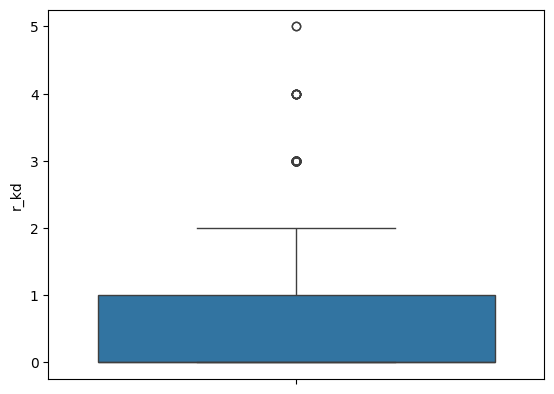

In [563]:
#checking for outliers in r_kd column in event data
sns.boxplot(event_detail_data['r_kd'])
plt.show()

In [564]:
#As, there are outliers we used median to fill null values
event_detail_data['r_kd'] = event_detail_data['r_kd'].fillna(event_detail_data['r_kd'].median())

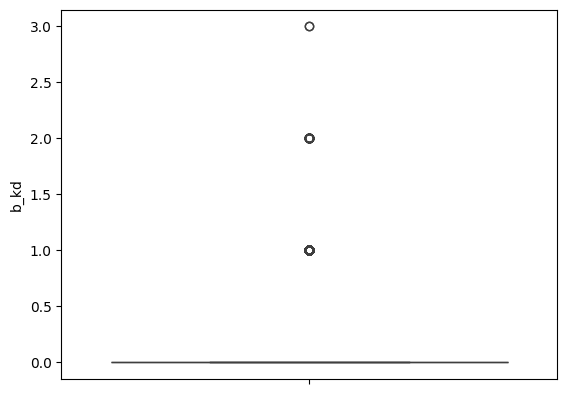

In [565]:
#Checking for outliers in b_kd column in event data
sns.boxplot(event_detail_data['b_kd'])
plt.show()

In [566]:
#As, there are outliers we used median to fill null values
event_detail_data['b_kd'] = event_detail_data['b_kd'].fillna(event_detail_data['r_kd'].median())

<Axes: ylabel='r_str'>

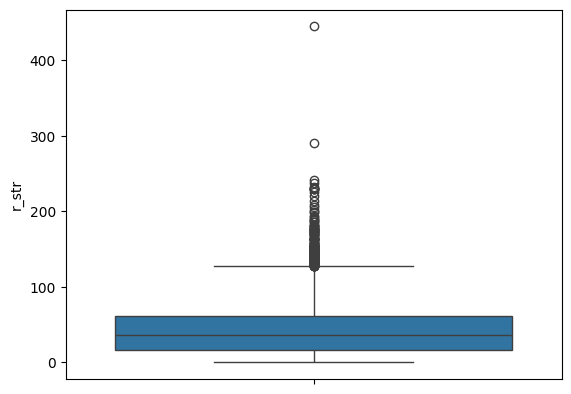

In [567]:
#Checking for outliers in r_str column
sns.boxplot(event_detail_data['r_str'])

In [568]:
#As, there are outliers we used median to fill null values
event_detail_data['r_str'] = event_detail_data['r_str'].fillna(event_detail_data['r_str'].median())

<Axes: ylabel='b_str'>

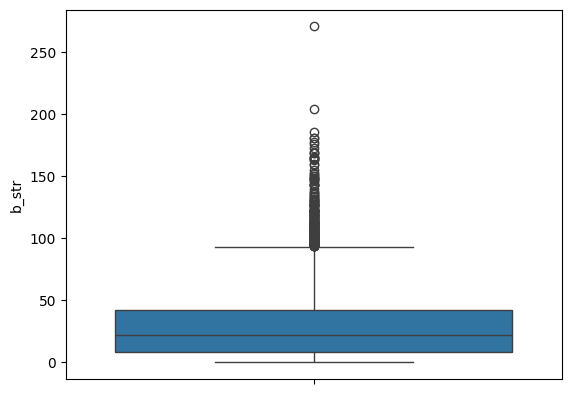

In [569]:
#Checking for outliers in b_str column
sns.boxplot(event_detail_data['b_str'])

In [570]:
#As, there are outliers we used median to fill null values
event_detail_data['b_str'] = event_detail_data['b_str'].fillna(event_detail_data['b_str'].median())

<Axes: ylabel='r_td'>

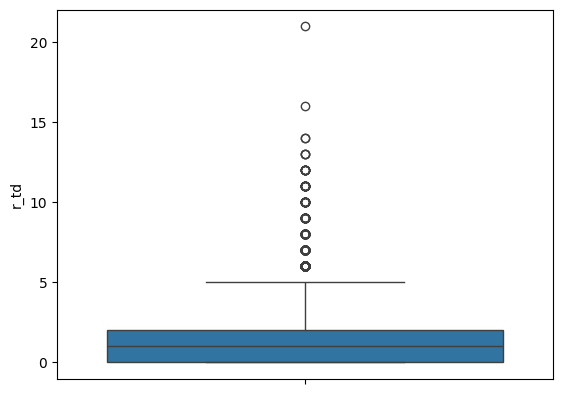

In [571]:
#Checking for outliers in r_td column
sns.boxplot(event_detail_data['r_td'])

In [572]:
#As, there are outliers we used median to fill null values
event_detail_data['r_td'] = event_detail_data['r_td'].fillna(event_detail_data['r_td'].median())

<Axes: ylabel='b_td'>

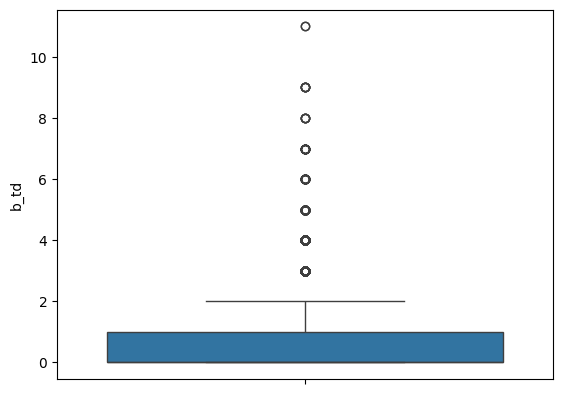

In [573]:
#Checking for outliers in b_td column
sns.boxplot(event_detail_data['b_td'])

In [574]:
#As, there are outliers we used median to fill null values
event_detail_data['b_td'] = event_detail_data['b_td'].fillna(event_detail_data['b_td'].median())

<Axes: ylabel='r_sub'>

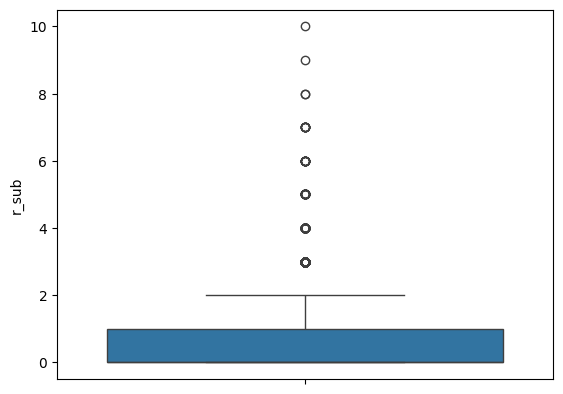

In [575]:
#Checking for outliers in r_sub column
sns.boxplot(event_detail_data['r_sub'])

In [576]:
#As, there are outliers we used median to fill null values
event_detail_data['r_sub'] = event_detail_data['r_sub'].fillna(event_detail_data['r_sub'].median())

<Axes: ylabel='b_sub'>

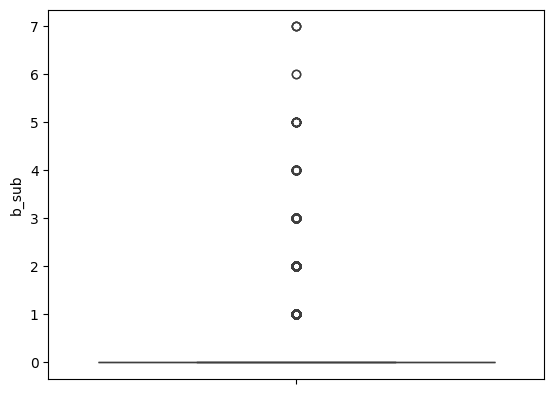

In [577]:
#Checking for outliers in b_sub column
sns.boxplot(event_detail_data['b_sub'])

In [578]:
#As, there are outliers we used median to fill null values
event_detail_data['b_sub'] = event_detail_data['b_sub'].fillna(event_detail_data['b_sub'].median())

In [579]:
#Deriving winner column
event_detail_data['winner'] = np.where(event_detail_data['status'] == 'win', event_detail_data['r_fighter'],event_detail_data['b_fighter'])

In [580]:
# Split the 'time' column into minutes and seconds
event_detail_data[["minutes", "seconds"]] = (
    event_detail_data["time"].str.split(":", expand=True).astype(int)
)

In [581]:
# Convert time to total seconds
event_detail_data["time_in_seconds"] = (event_detail_data["minutes"] * 60) + event_detail_data["seconds"]

In [582]:
#deriving fight duration in seconds
round_duration = 300  # seconds (5 minutes)
event_detail_data['fight_time_seconds'] = (event_detail_data['round'] - 1) * round_duration + event_detail_data['time_in_seconds']

In [583]:
# combining total damage by both fighter in r_total_damage and b_total_damage respectively
event_detail_data["r_total_damage"] = event_detail_data["r_kd"] + event_detail_data["r_str"]
event_detail_data["b_total_damage"] = event_detail_data["b_kd"] + event_detail_data["b_str"]

In [584]:
# combining takedowns per round by both fighter in r_td_per_round and b_td_per_round respectively
event_detail_data["r_td_per_round"] =event_detail_data["r_td"] /event_detail_data["round"]
event_detail_data["b_td_per_round"] =event_detail_data["b_td"] /event_detail_data["round"]

In [585]:
# combining submission per round by both fighter in r_sub_per_round and b_sub_per_roundrespectively
event_detail_data["r_sub_per_round"] = event_detail_data["r_sub"] / event_detail_data["round"]
event_detail_data["b_sub_per_round"] = event_detail_data["b_sub"] / event_detail_data["round"]

In [586]:
# Droping columns as they are already normalized or have been derived r_kd, b_kd, r_str, b_str, r_td, b_td, r_sub, b_sub, status, minuter, seconds, time_in_seconds
event_detail_data = event_detail_data.drop(columns=['status','r_kd', 'b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub','minutes','seconds','time_in_seconds'])

In [587]:
event_detail_data["event"] = event_detail_data["event"].apply(lambda x: x.split(":")[0])

In [588]:
#saved cleaned data to new csv
event_detail_data.to_csv('../Datasets/cleaned_event_data.csv')

In [589]:
event_detail_data.head()

,event,date,location,r_fighter,b_fighter,weight_class,method,round,time,winner,fight_time_seconds,r_total_damage,b_total_damage,r_td_per_round,b_td_per_round,r_sub_per_round,b_sub_per_round
0,UFC Fight Night,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,Women's Flyweight,U-DEC,5.0,5:00,Rose Namajunas,1500.0,93.0,83.0,0.200000,0.8,0.000000,0.0
1,UFC Fight Night,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,Heavyweight,U-DEC,3.0,5:00,Karl Williams,900.0,40.0,21.0,2.333333,0.0,0.333333,0.0
2,UFC Fight Night,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,Middleweight,KO/TKO,1.0,4:33,Edmen Shahbazyan,273.0,28.0,15.0,1.000000,0.0,0.000000,0.0
3,UFC Fight Night,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,Bantamweight,KO/TKO,2.0,0:21,Payton Talbott,321.0,80.0,31.0,0.000000,0.0,0.000000,0.0
4,UFC Fight Night,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,Featherweight,SUB,2.0,1:50,Youssef Zalal,410.0,33.0,10.0,1.000000,0.0,1.000000,0.0


In [590]:
event_detail_data.nunique()

event                  317
date                   678
location               168
r_fighter             1721
b_fighter             2344
weight_class            15
method                   7
round                    5
time                   339
winner                1722
fight_time_seconds     903
r_total_damage         202
b_total_damage         162
r_td_per_round          38
b_td_per_round          26
r_sub_per_round         25
b_sub_per_round         18
dtype: int64

### **Visualization of Event Data**

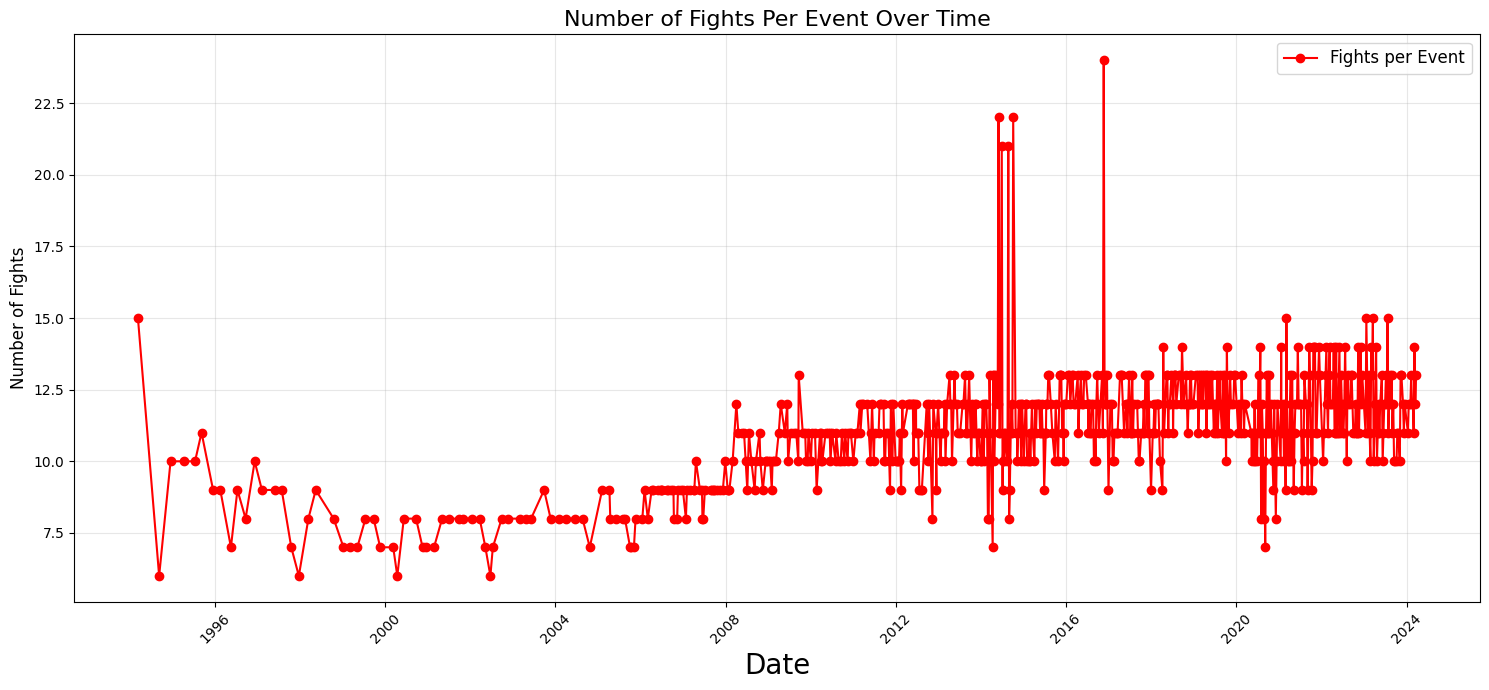

In [ ]:
# Convert 'date' to datetime format for better sorting and plotting
event_detail_data['date'] = pd.to_datetime(event_detail_data['date'])

# Group by event and date to count the number of fights per event
fights_per_event = event_detail_data.groupby(['date', 'event']).size().reset_index(name='fight_count')

# Plot a line chart for fights per event over time
plt.figure(figsize=(15, 7))
plt.plot(fights_per_event['date'], fights_per_event['fight_count'], marker='o', linestyle='-', color='r', label='Fights per Event')
plt.title('Number of Fights Per Event Over Time', fontsize=16)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Fights', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

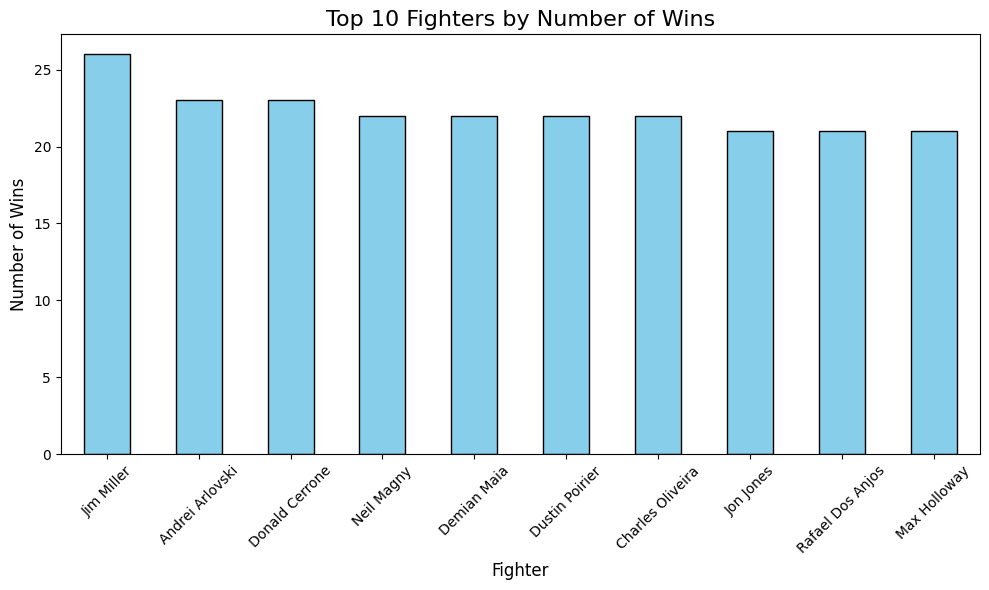

In [592]:
# Calculate the frequency of each winner
winner_counts = event_detail_data["winner"].value_counts()

# Select the top 10 winners
top_winners = winner_counts.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_winners.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Fighters by Number of Wins", fontsize=16)
plt.xlabel("Fighter", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

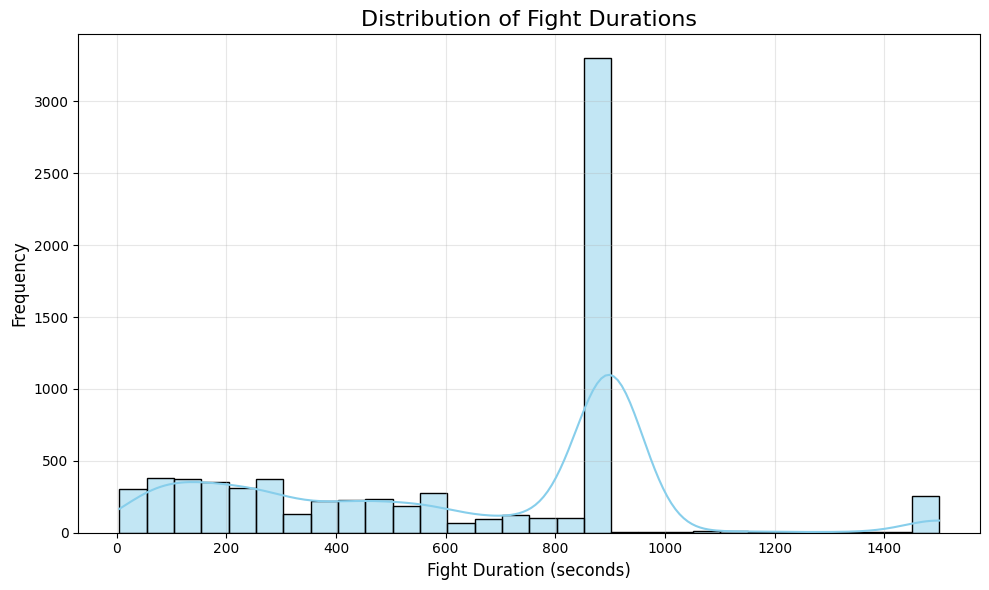

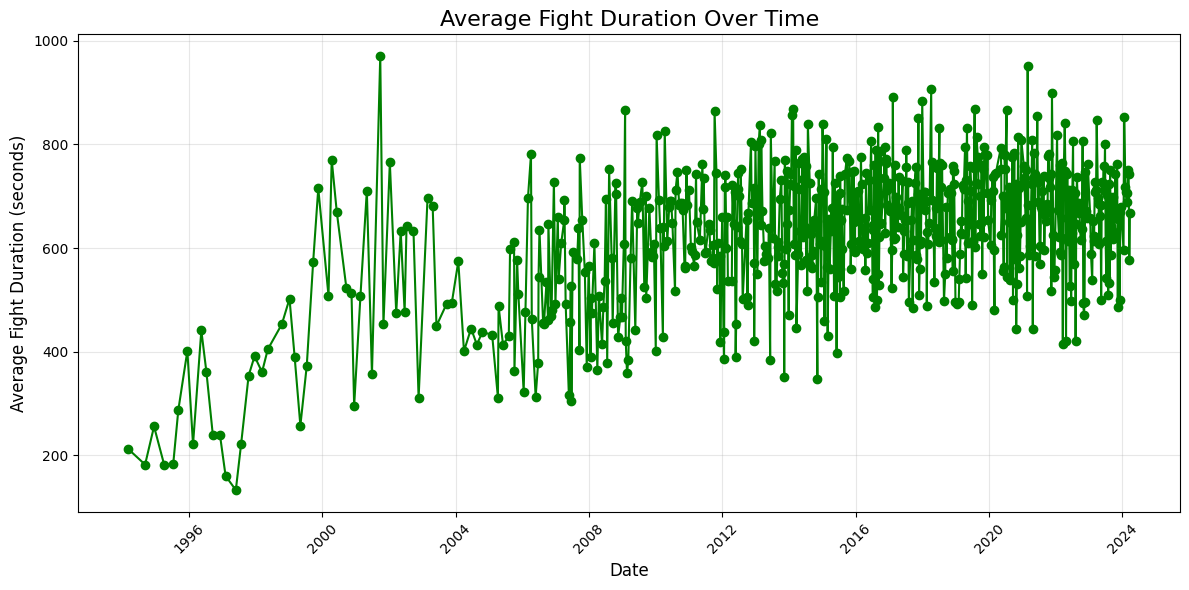

In [593]:
# Ensure 'fight_time_seconds' column exists and is numeric
if "fight_time_seconds" in event_detail_data.columns:
    # 1. Histogram for Fight Duration Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(event_detail_data["fight_time_seconds"], bins=30, kde=True, color="skyblue")
    plt.title("Distribution of Fight Durations", fontsize=16)
    plt.xlabel("Fight Duration (seconds)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2. Line Chart for Average Fight Duration Over Time
    avg_fight_duration = (
        event_detail_data.groupby("date")["fight_time_seconds"].mean().reset_index()
    )

    plt.figure(figsize=(12, 6))
    plt.plot(
        avg_fight_duration["date"],
        avg_fight_duration["fight_time_seconds"],
        marker="o",
        color="green",
    )
    plt.title("Average Fight Duration Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Average Fight Duration (seconds)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("The 'fight_time_seconds' column is missing or not numeric.")

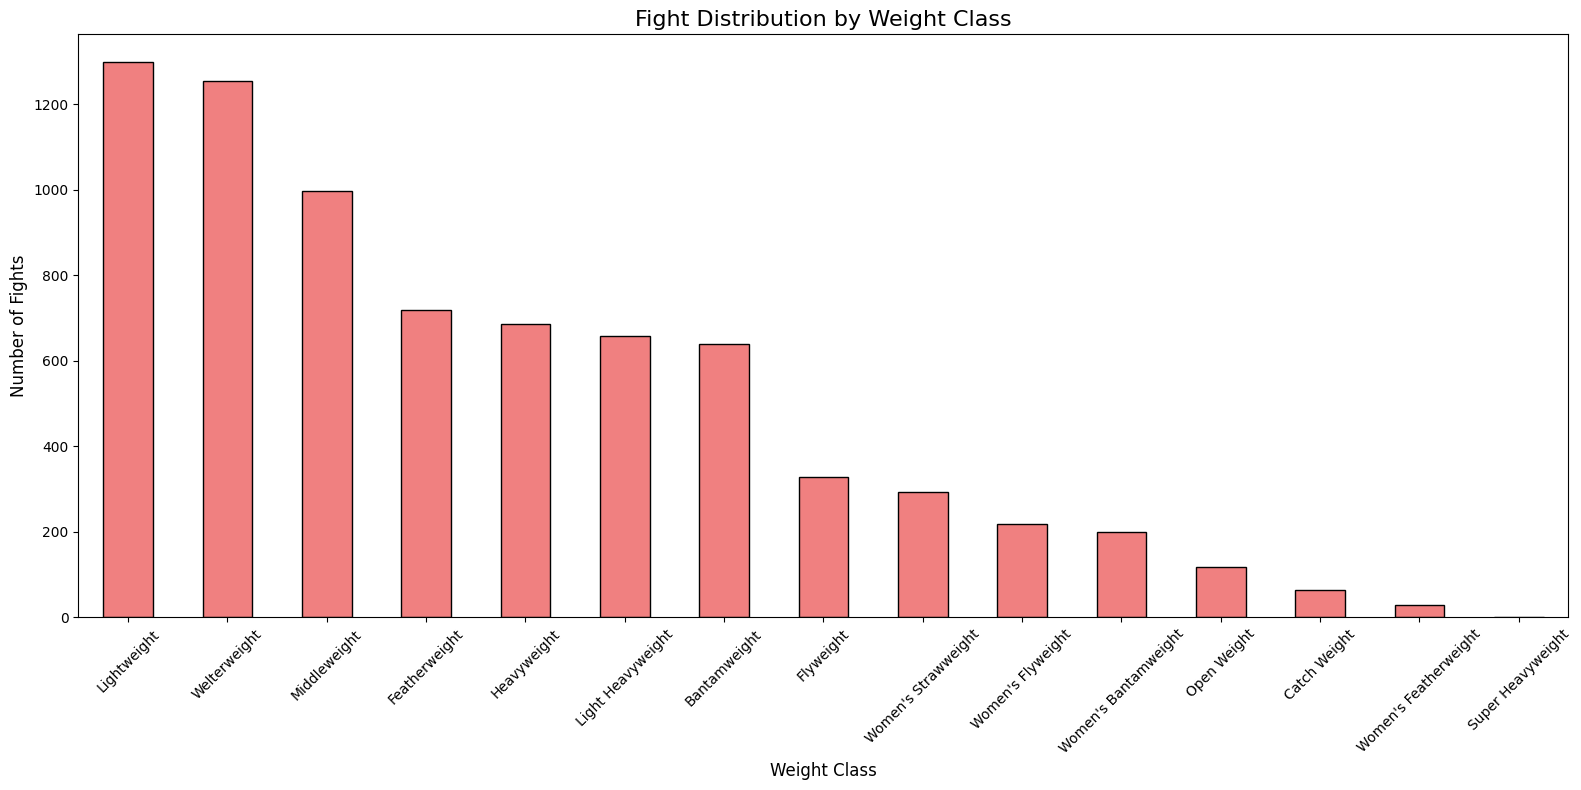

In [594]:

# Calculate the frequency of fights for each weight class
weight_class_counts = event_detail_data["weight_class"].value_counts()

# Bar Chart for Fight Distribution by Weight Class
plt.figure(figsize=(16, 8))
weight_class_counts.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Fight Distribution by Weight Class", fontsize=16)
plt.xlabel("Weight Class", fontsize=12)
plt.ylabel("Number of Fights", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()



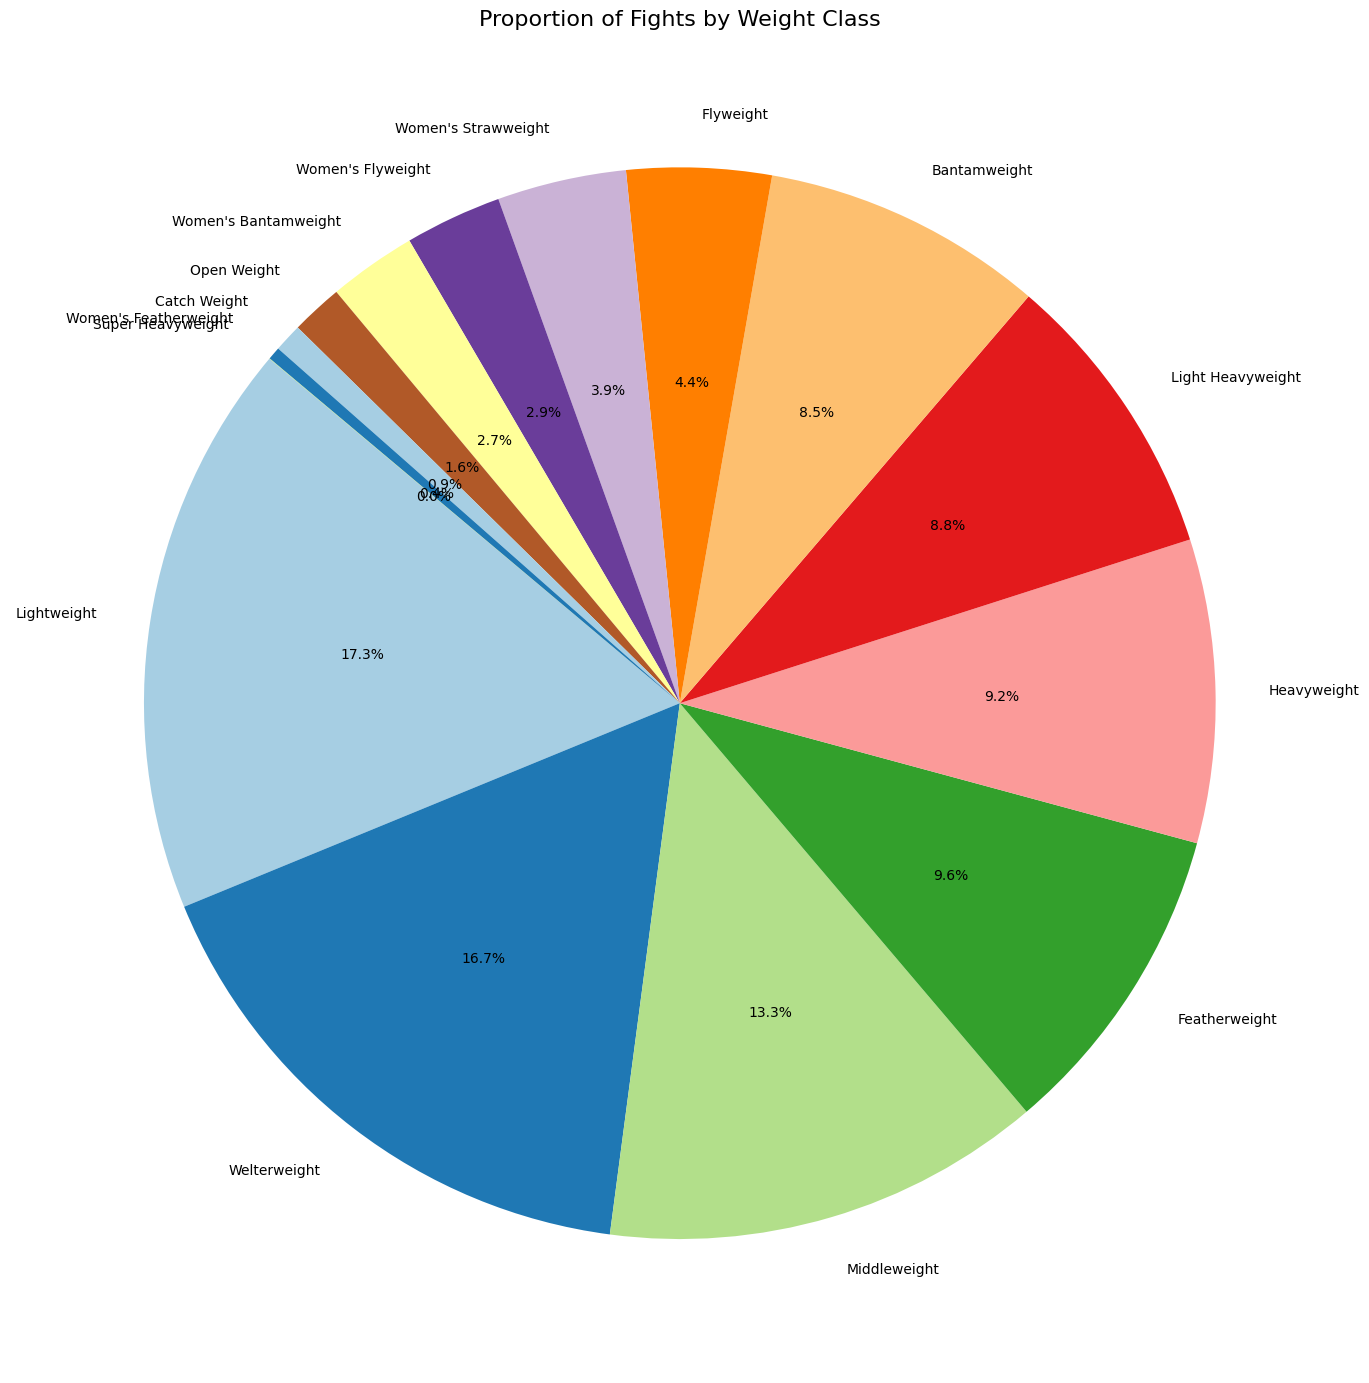

In [595]:
# Pie Chart for Proportion of Fights by Weight Class
plt.figure(figsize=(14, 14))
weight_class_counts.plot(
    kind="pie", autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors
)
plt.title("Proportion of Fights by Weight Class", fontsize=16)
plt.ylabel("")  # Remove y-axis label for a cleaner pie chart
plt.tight_layout()
plt.show()

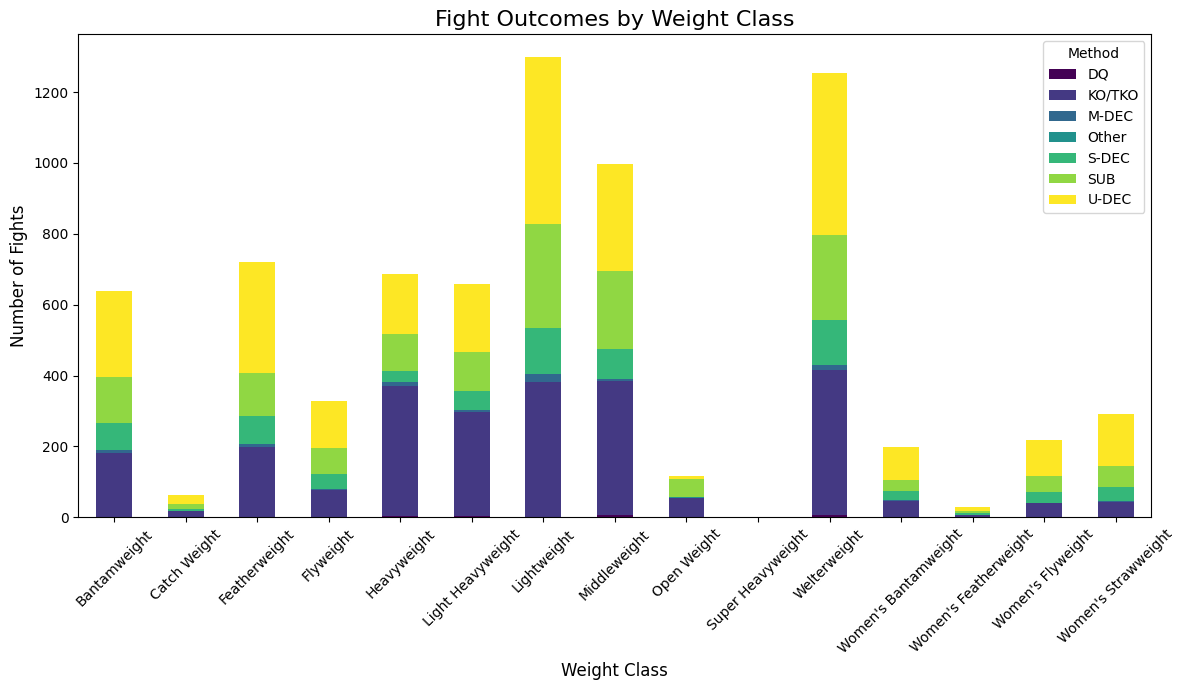

In [596]:
# Group by weight class and method to get counts
outcome_by_weight_class = event_detail_data.groupby(['weight_class', 'method']).size().unstack(fill_value=0)

# Plot stacked bar chart
outcome_by_weight_class.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Fight Outcomes by Weight Class', fontsize=16)
plt.xlabel('Weight Class', fontsize=12)
plt.ylabel('Number of Fights', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Method', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16636\1432391586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


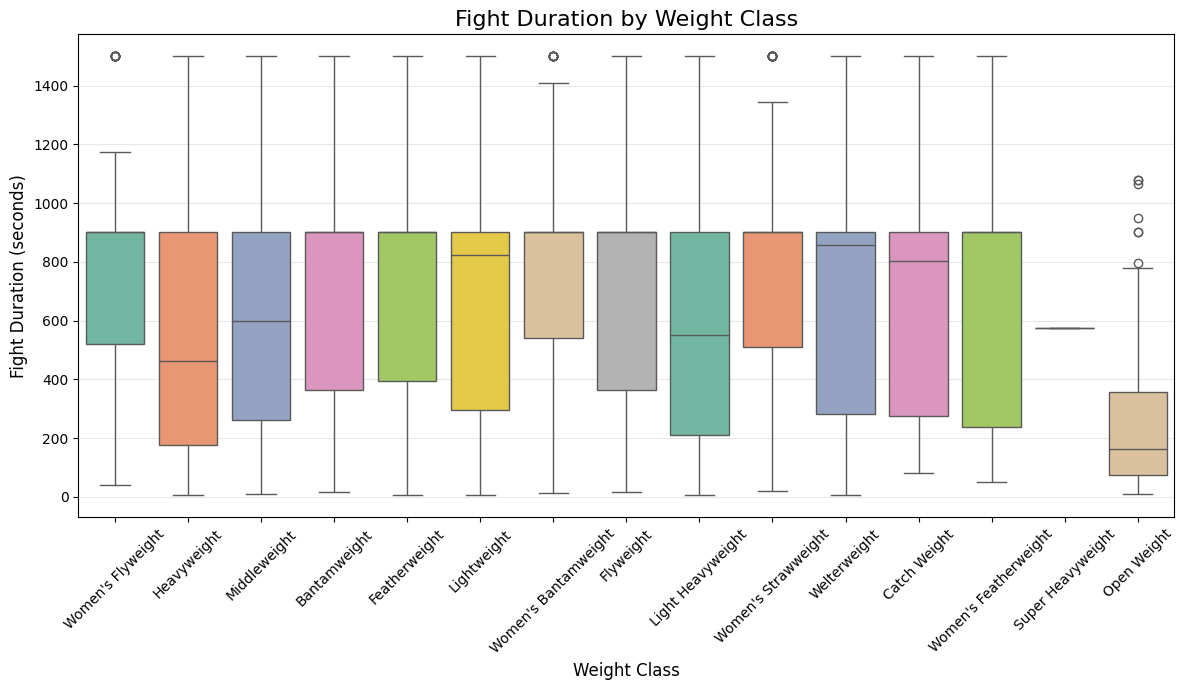

In [597]:
# Ensure 'fight_time_seconds' and 'weight_class' columns exist
plt.figure(figsize=(12, 7))
sns.boxplot(
        data=event_detail_data, x="weight_class", y="fight_time_seconds", palette="Set2"
    )
plt.title("Fight Duration by Weight Class", fontsize=16)
plt.xlabel("Weight Class", fontsize=12)
plt.ylabel("Fight Duration (seconds)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

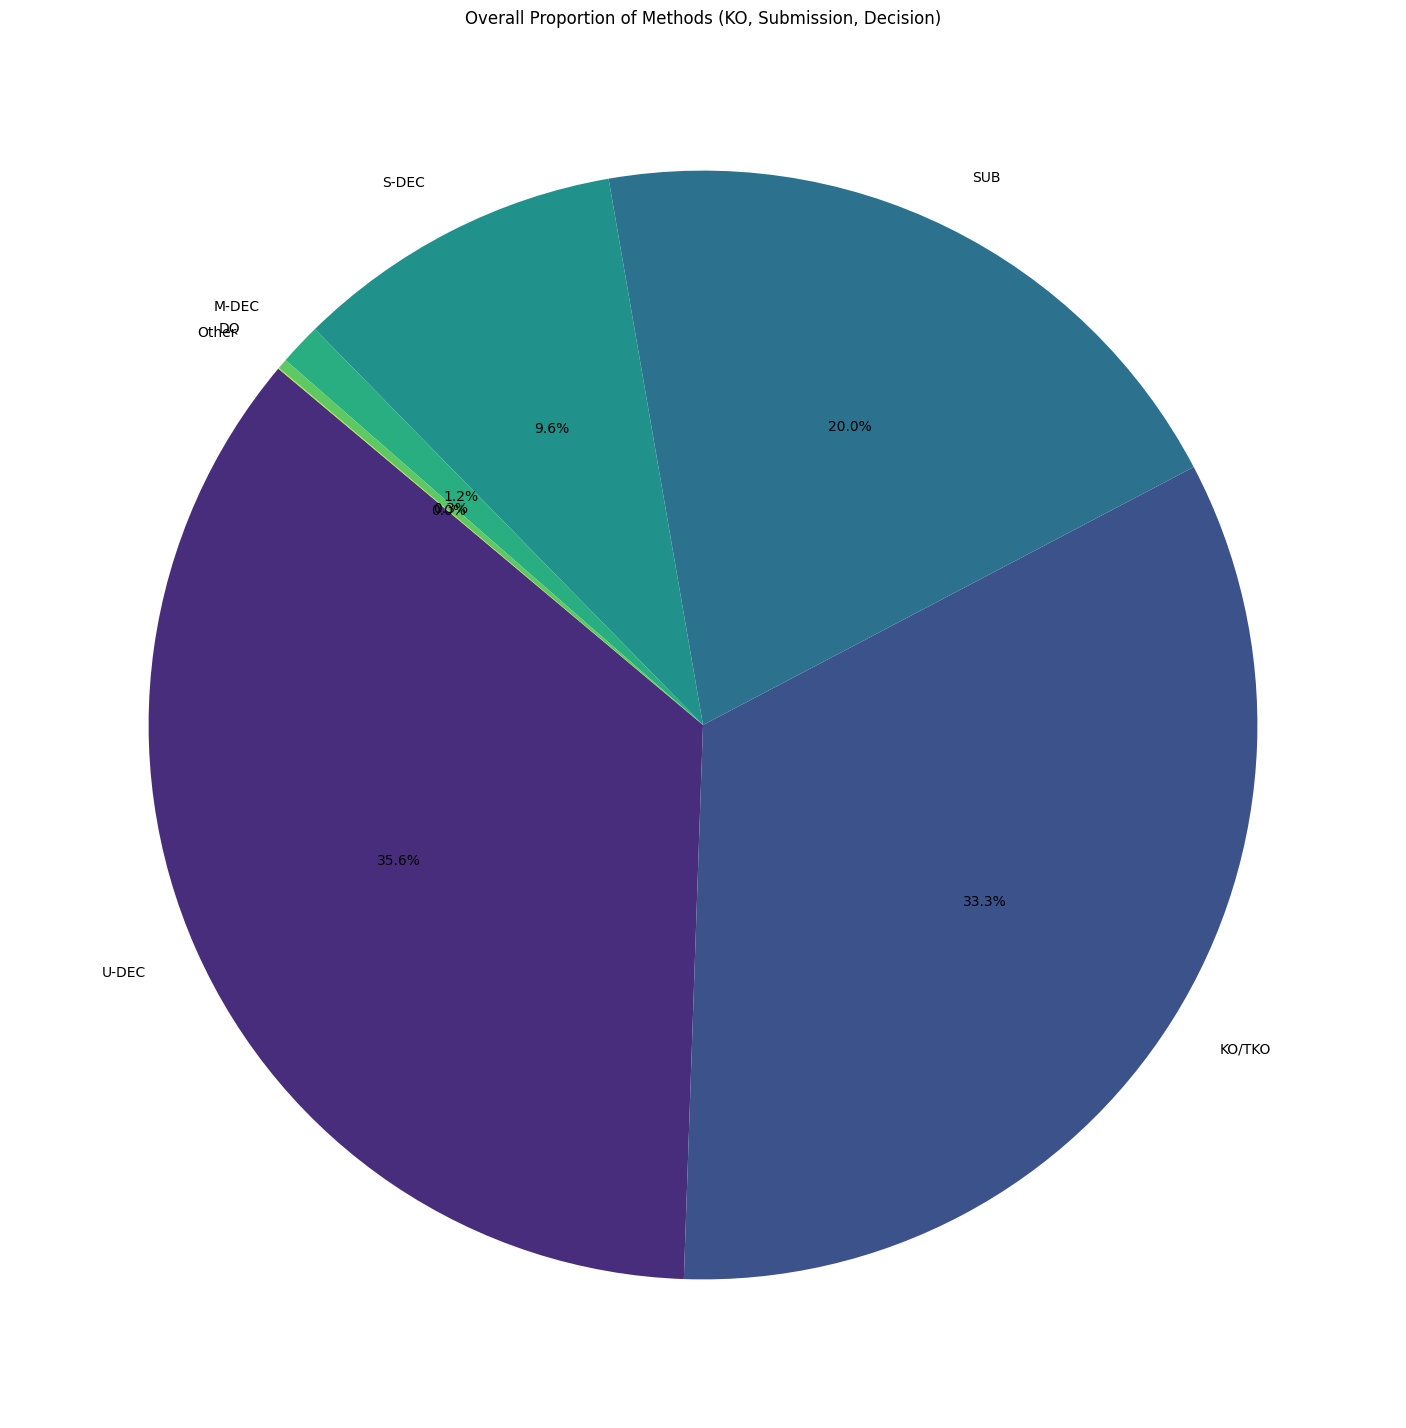

In [598]:
# Count the occurrences of each method
method_counts = event_detail_data["method"].value_counts()

# Plot the pie chart
plt.figure(figsize=(18,18))
plt.pie(
    method_counts,
    labels=method_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("viridis", len(method_counts)),
)
plt.title("Overall Proportion of Methods (KO, Submission, Decision)")
plt.show()

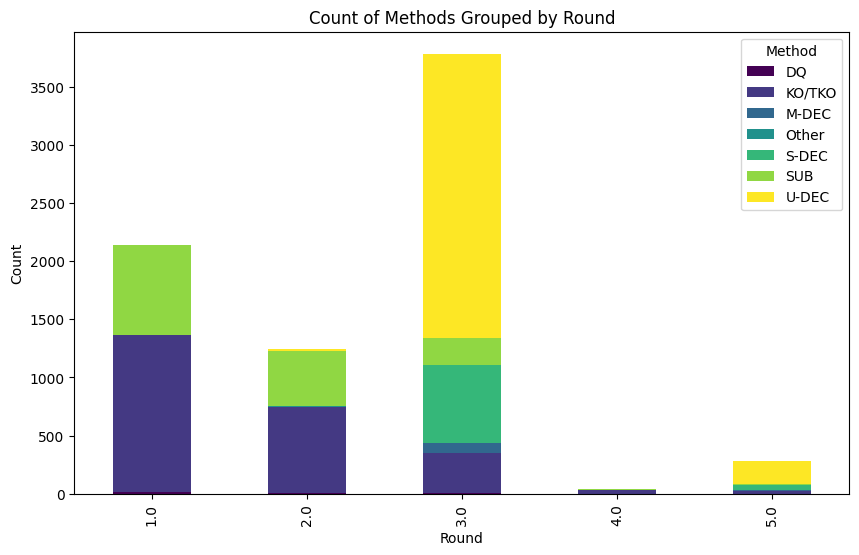

In [599]:
# Create a pivot table to count methods by round
pivot_table = event_detail_data.pivot_table(
    index="round", columns="method", aggfunc="size", fill_value=0
)

# Plot the stacked bar chart
pivot_table.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Count of Methods Grouped by Round")
plt.xlabel("Round")
plt.ylabel("Count")
plt.legend(title="Method")
plt.show()

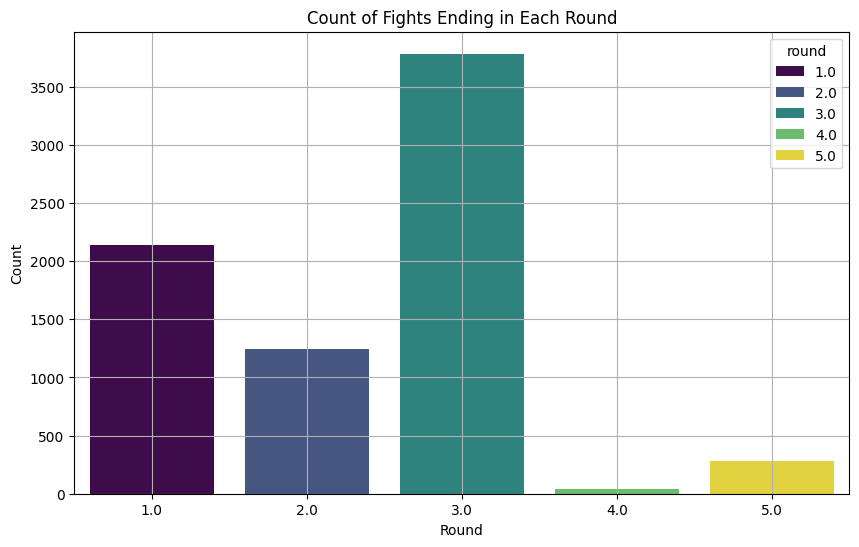

In [600]:
#Bar chart to visualize the count of fights ending in each round
plt.figure(figsize=(10, 6))
sns.countplot(data=event_detail_data, x="round",hue="round", palette="viridis")
plt.title("Count of Fights Ending in Each Round")
plt.xlabel("Round")
plt.ylabel("Count")
plt.grid(True)
plt.show()

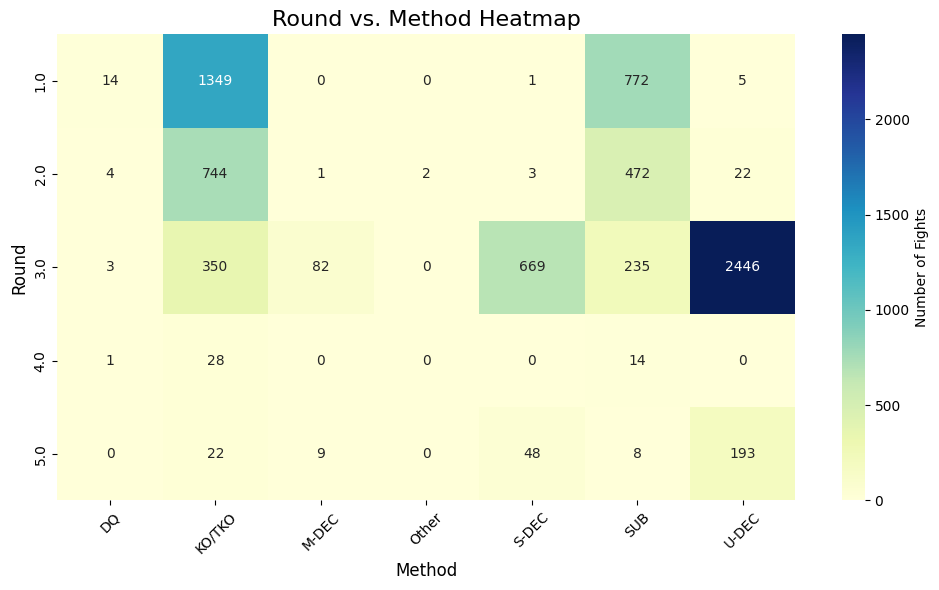

In [601]:

# Create a pivot table to count fights by round and method
round_method_pivot = event_detail_data.pivot_table(
        index="round", columns="method", aggfunc="size", fill_value=0
    )

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
        round_method_pivot,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        cbar_kws={"label": "Number of Fights"},
    )
plt.title("Round vs. Method Heatmap", fontsize=16)
plt.xlabel("Method", fontsize=12)
plt.ylabel("Round", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

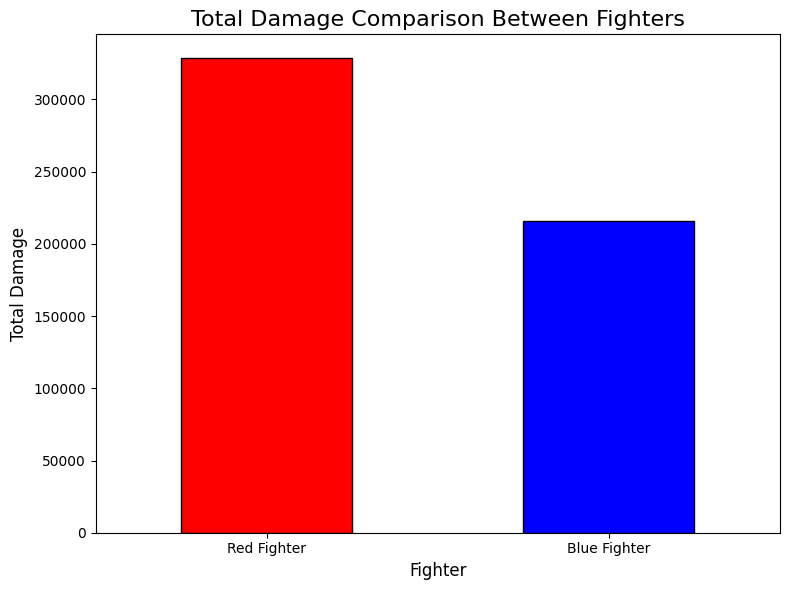

In [602]:
# Calculate total damage for each fighter
damage_data = event_detail_data[['r_total_damage', 'b_total_damage']].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
damage_data.plot(kind='bar', color=['red', 'blue'], edgecolor='black')
plt.title('Total Damage Comparison Between Fighters', fontsize=16)
plt.xlabel('Fighter', fontsize=12)
plt.ylabel('Total Damage', fontsize=12)
plt.xticks([0, 1], ['Red Fighter', 'Blue Fighter'], rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16636\3538736879.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fighter', y='Total Damage', data=damage_data, palette='Set2')


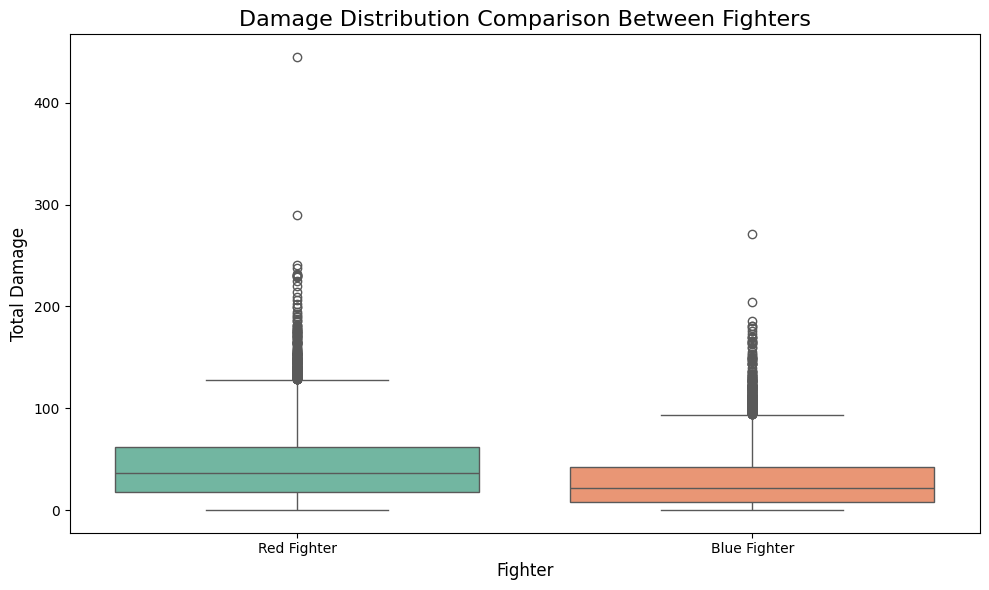

In [603]:
 # Combine both damage columns into a single DataFrame for plotting
damage_data = pd.melt(event_detail_data[['r_total_damage', 'b_total_damage']], value_vars=['r_total_damage', 'b_total_damage'],
                          var_name='Fighter', value_name='Total Damage')

    # Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fighter', y='Total Damage', data=damage_data, palette='Set2')
plt.title('Damage Distribution Comparison Between Fighters', fontsize=16)
plt.xlabel('Fighter', fontsize=12)
plt.ylabel('Total Damage', fontsize=12)
plt.xticks([0, 1], ['Red Fighter', 'Blue Fighter'], rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

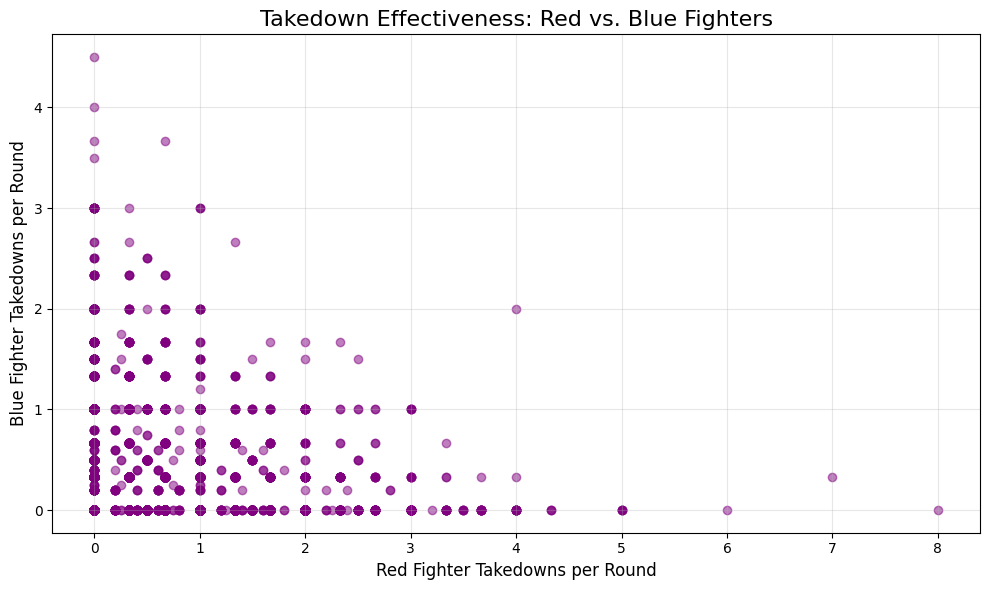

In [604]:
# Plot scatter plot comparing takedowns per round for both fighters
plt.figure(figsize=(10, 6))
plt.scatter(event_detail_data['r_td_per_round'], event_detail_data['b_td_per_round'], color='purple', alpha=0.5)
plt.title('Takedown Effectiveness: Red vs. Blue Fighters', fontsize=16)
plt.xlabel('Red Fighter Takedowns per Round', fontsize=12)
plt.ylabel('Blue Fighter Takedowns per Round', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

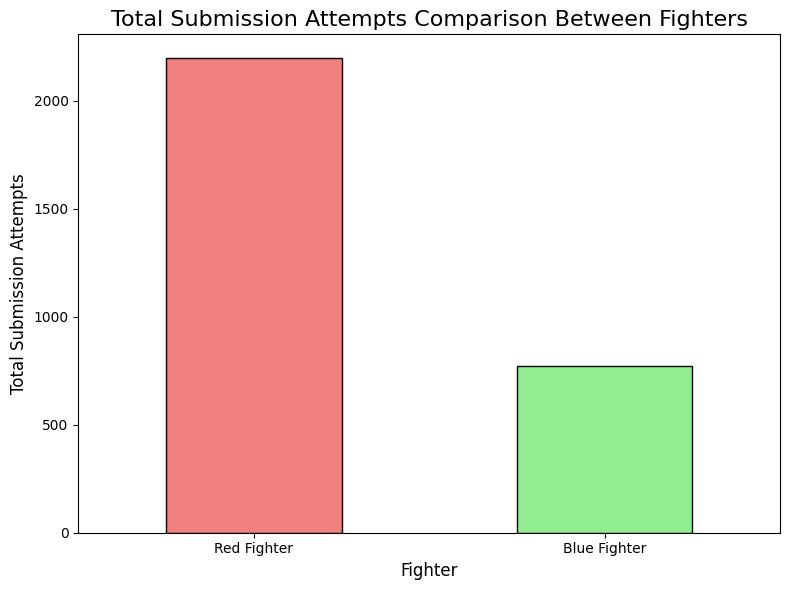

In [605]:
# Calculate total submission attempts for red and blue fighters
submission_data = event_detail_data[['r_sub_per_round', 'b_sub_per_round']].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
submission_data.plot(kind='bar', color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Total Submission Attempts Comparison Between Fighters', fontsize=16)
plt.xlabel('Fighter', fontsize=12)
plt.ylabel('Total Submission Attempts', fontsize=12)
plt.xticks([0, 1], ['Red Fighter', 'Blue Fighter'], rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

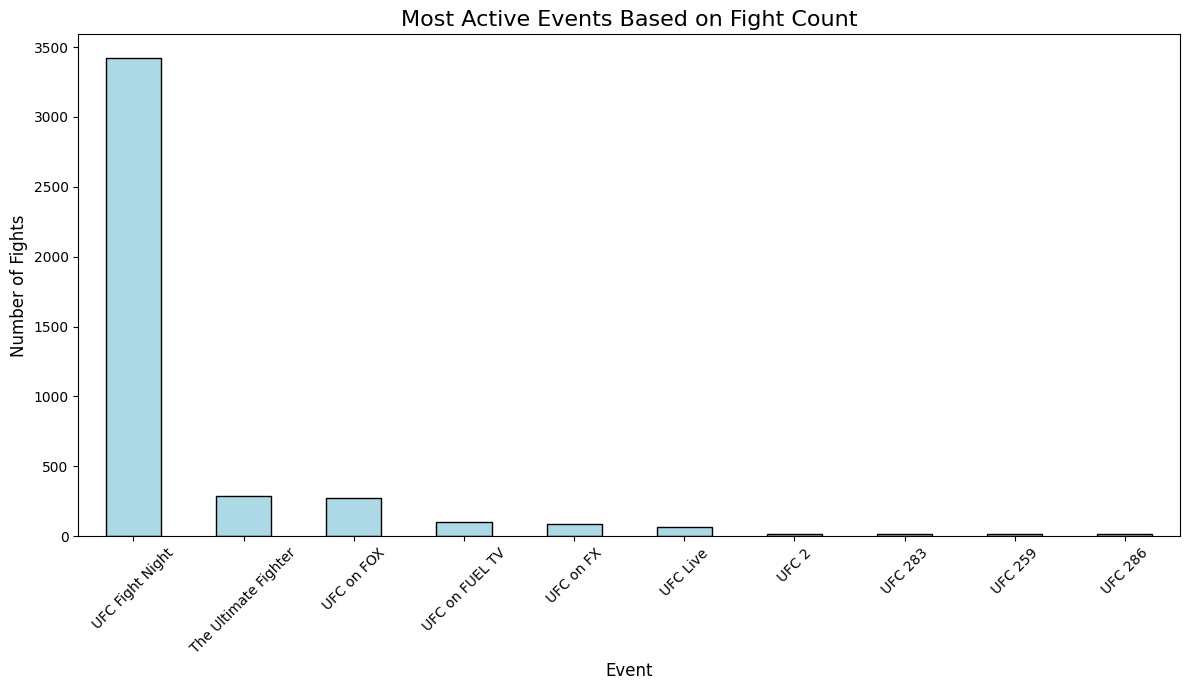

In [606]:
# Calculate the number of fights per event
event_counts = event_detail_data["event"].value_counts()
#Plot the bar chart
plt.figure(figsize=(12, 7))
event_counts.head(10).plot(
        kind="bar", color="lightblue", edgecolor="black"
    )  # Top 10 most popular events
plt.title("Most Active Events Based on Fight Count", fontsize=16)
plt.xlabel("Event", fontsize=12)
plt.ylabel("Number of Fights", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

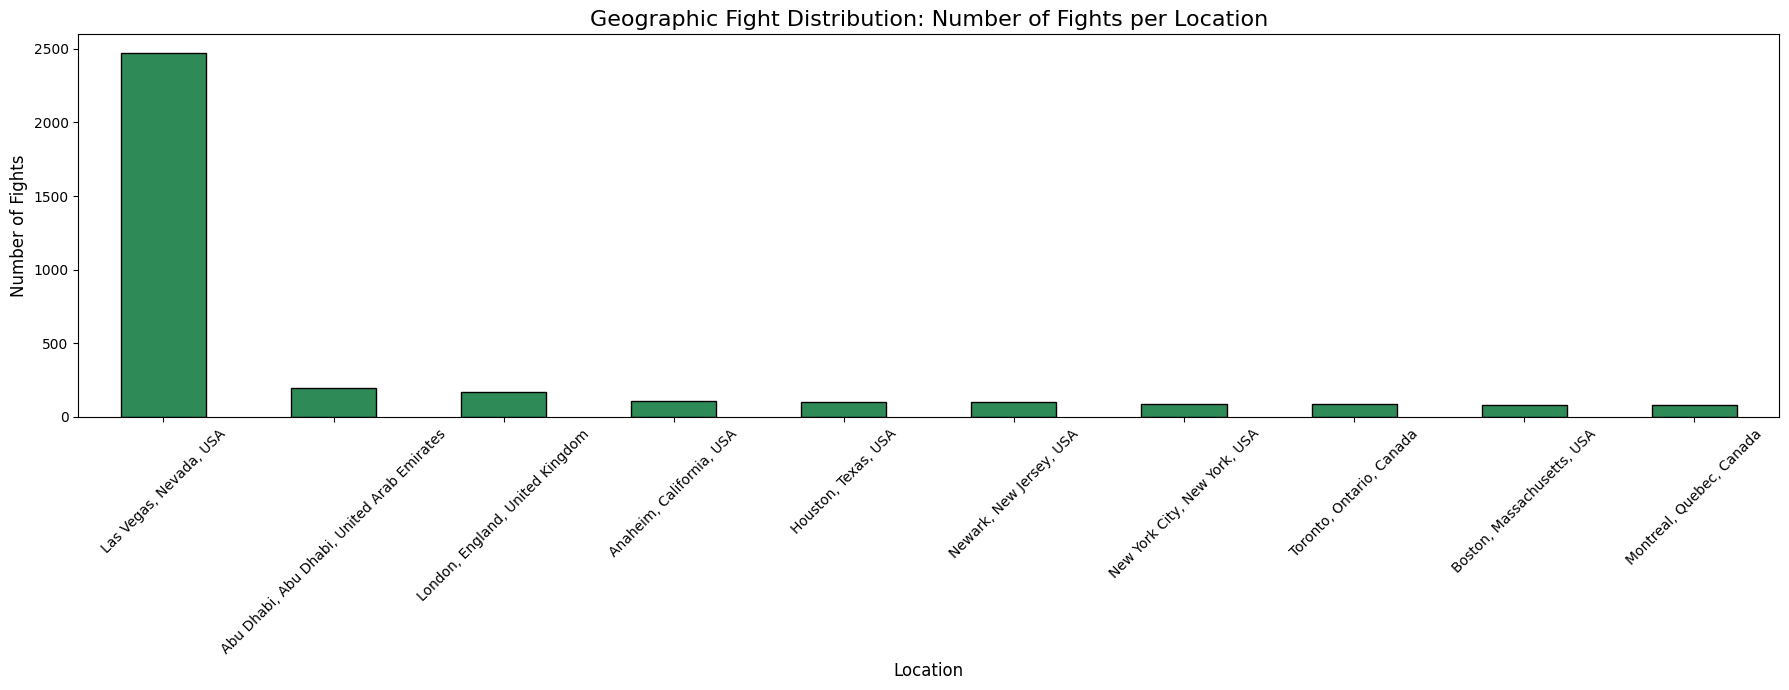

In [610]:

# Calculate the number of fights held in each location
location_counts = event_detail_data["location"].value_counts()

# Plot the bar chart
plt.figure(figsize=(18, 7))
location_counts.head(10).plot(
        kind="bar", color="seagreen", edgecolor="black"
    )  # Top 10 locations
plt.title(
        "Geographic Fight Distribution: Number of Fights per Location", fontsize=16
    )
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Fights", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


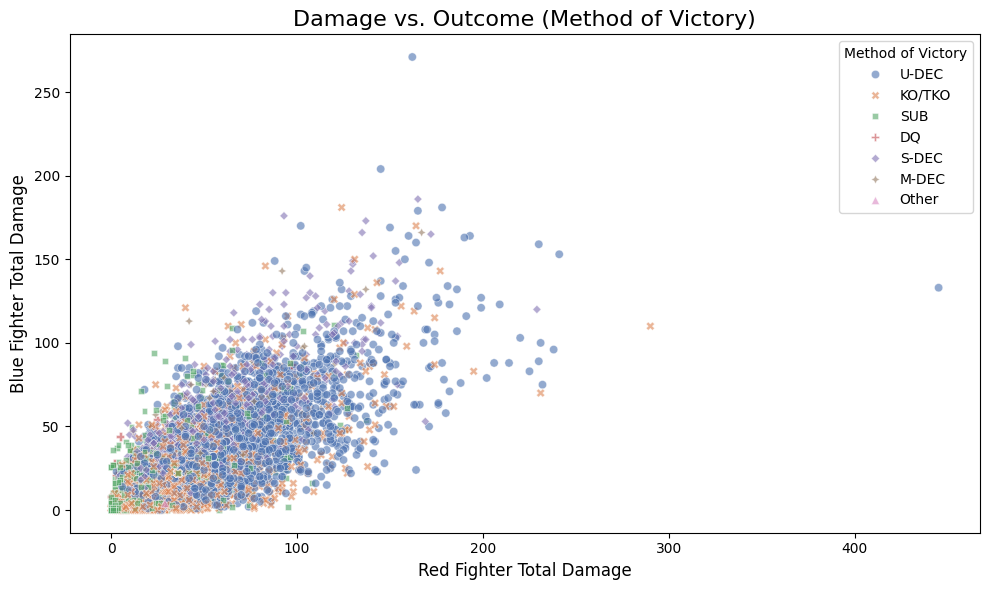

In [611]:

plt.figure(figsize=(10, 6))

# Plot using seaborn's scatterplot
sns.scatterplot(
        data=event_detail_data,
        x="r_total_damage",
        y="b_total_damage",
        hue="method",
        style="method",
        palette="deep",
        alpha=0.6,
    )

plt.title("Damage vs. Outcome (Method of Victory)", fontsize=16)
plt.xlabel("Red Fighter Total Damage", fontsize=12)
plt.ylabel("Blue Fighter Total Damage", fontsize=12)
plt.legend(title="Method of Victory", fontsize=10)
plt.tight_layout()
plt.show()

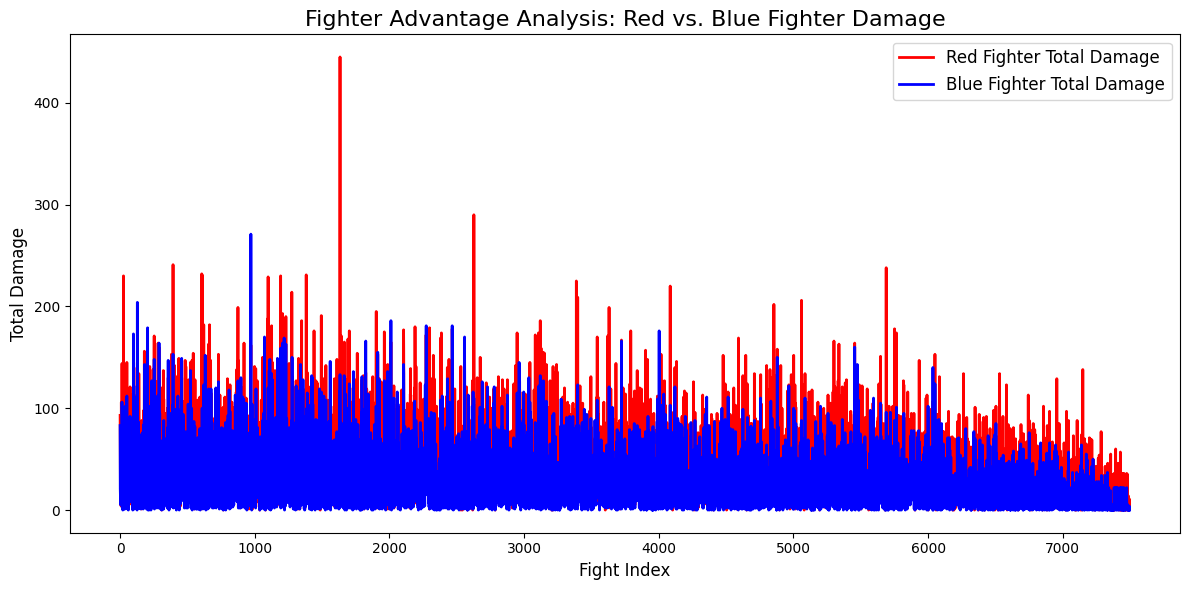

In [614]:

plt.figure(figsize=(12, 6))

# Plot line charts for red and blue fighters' total damage
plt.plot(
        event_detail_data.index,
        event_detail_data["r_total_damage"],
        label="Red Fighter Total Damage",
        color="red",
        linewidth=2,
    )
plt.plot(
        event_detail_data.index,
        event_detail_data["b_total_damage"],
        label="Blue Fighter Total Damage",
        color="blue",
        linewidth=2,
    )

plt.title("Fighter Advantage Analysis: Red vs. Blue Fighter Damage", fontsize=16)
plt.xlabel("Fight Index", fontsize=12)
plt.ylabel("Total Damage", fontsize=12)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()


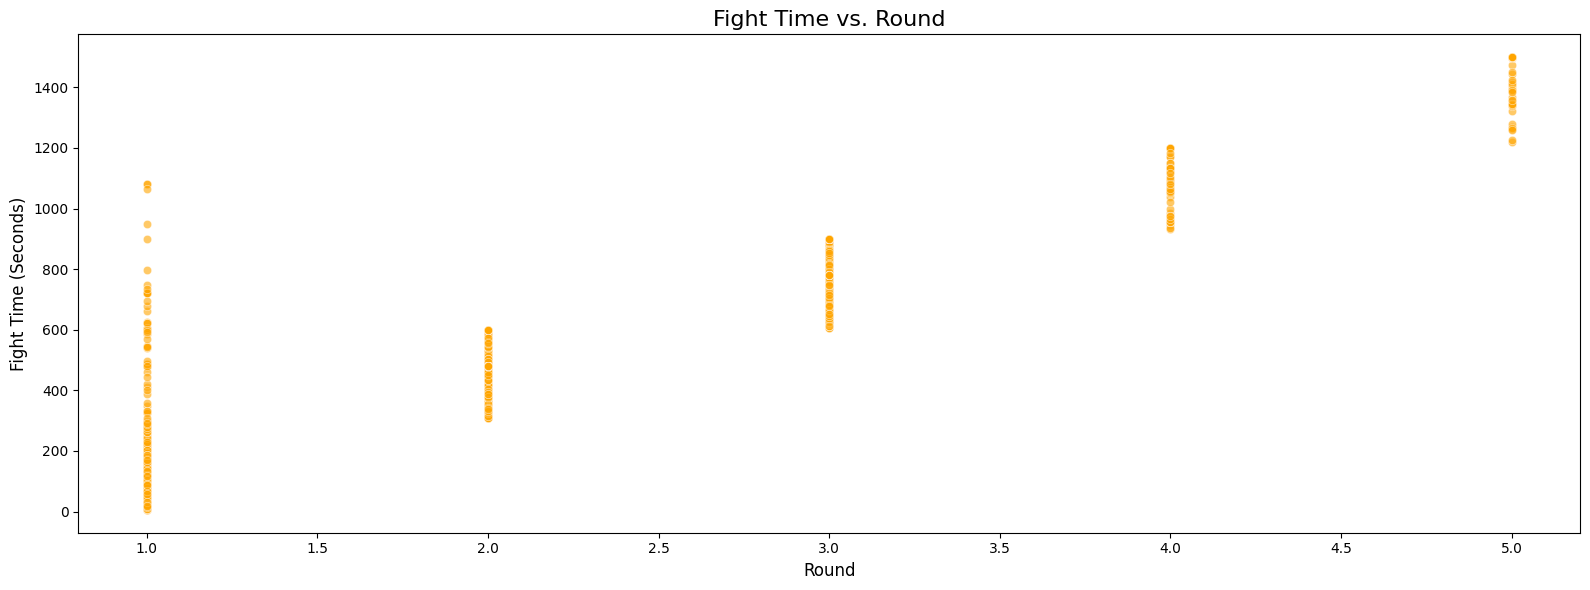

In [616]:

plt.figure(figsize=(16, 6))

# Plot the scatter plot to show the relationship between fight time and rounds
sns.scatterplot(
        data=event_detail_data, x="round", y="fight_time_seconds", color="orange", alpha=0.6
    )

plt.title("Fight Time vs. Round", fontsize=16)
plt.xlabel("Round", fontsize=12)
plt.ylabel("Fight Time (Seconds)", fontsize=12)
plt.tight_layout()
plt.show()
